# Exploratory Data Analysis (EDA)

In this notebook I will conduct exploratory data analysis on the Amazon Sales Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
from pathlib import Path

In [2]:
ds = pd.read_csv("../data/Amazon.csv")

In [3]:
ds

OrderID   OrderDate  CustomerID   CustomerName ProductID  \
0      ORD0000001  2023-01-31  CUST001504  Vihaan Sharma    P00014   
1      ORD0000002  2023-12-30  CUST000178    Pooja Kumar    P00040   
2      ORD0000003  2022-05-10  CUST047516    Sneha Singh    P00044   
3      ORD0000004  2023-07-18  CUST030059   Vihaan Reddy    P00041   
4      ORD0000005  2023-02-04  CUST048677  Aditya Kapoor    P00029   
...           ...         ...         ...            ...       ...   
99995  ORD0099996  2023-03-07  CUST001356    Karan Joshi    P00047   
99996  ORD0099997  2021-11-24  CUST031254  Sunita Kapoor    P00046   
99997  ORD0099998  2023-04-29  CUST012579     Aman Gupta    P00030   
99998  ORD0099999  2021-11-01  CUST026243   Simran Gupta    P00046   
99999  ORD0100000  2021-12-04  CUST029492   Sunita Reddy    P00019   

               ProductName           Category       Brand  Quantity  \
0               Drone Mini              Books   BrightLux         3   
1               Microphone     Home & Kitchen  UrbanStyle         1   
2      Power Bank 20000mAh           Clothing  UrbanStyle         3   
3           Webcam Full HD     Home & Kitchen      Zenith         5   
4                  T-Shirt           Clothing    KiddoFun         2   
...                    ...                ...         ...       ...   
99995    Memory Card 128GB        Electronics        Apex         2   
99996          Car Charger  Sports & Outdoors        Apex         5   
99997          Dress Shirt  Sports & Outdoors   BrightLux         4   
99998          Car Charger  Sports & Outdoors    HomeEase         1   
99999        LED Desk Lamp     Home & Kitchen    CoreTech         5   

       UnitPrice  Discount     Tax  ShippingCost  TotalAmount  \
0         106.59      0.00    0.00          0.09       319.86   
1         251.37      0.05   19.10          1.74       259.64   
2          35.03      0.10    7.57          5.91       108.06   
3          33.58      0.15   11.42          5.53       159.66   
4         515.64      0.25   38.67          9.23       821.36   
...          ...       ...     ...           ...          ...   
99995     492.34      0.00   78.77          2.75      1066.20   
99996     449.30      0.00  179.72          6.07      2432.29   
99997     232.40      0.00   74.37         12.43      1016.40   
99998     294.05      0.00   23.52         13.09       330.66   
99999     166.70      0.05   63.35          3.34       858.52   

          PaymentMethod OrderStatus          City State        Country  \
0            Debit Card   Delivered    Washington    DC          India   
1            Amazon Pay   Delivered    Fort Worth    TX  United States   
2            Debit Card   Delivered        Austin    TX  United States   
3      Cash on Delivery   Delivered     Charlotte    NC          India   
4           Credit Card   Cancelled   San Antonio    TX         Canada   
...                 ...         ...           ...   ...            ...   
99995               UPI   Delivered  Jacksonville    FL          India   
99996       Credit Card   Delivered      San Jose    CA  United States   
99997  Cash on Delivery   Delivered  Indianapolis    IN  United States   
99998        Debit Card   Delivered     Charlotte    NC  United States   
99999        Debit Card   Delivered      New York    NY  United States   

        SellerID  
0      SELL01967  
1      SELL01298  
2      SELL00908  
3      SELL01164  
4      SELL01411  
...          ...  
99995  SELL00041  
99996  SELL01449  
99997  SELL00028  
99998  SELL00324  
99999  SELL00761  

[100000 rows x 20 columns]

In [4]:
ds.shape

# Confirming the dataset shape is 100000 rows x 20 columns

(100000, 20)

In [5]:
ds.columns

# Quick overview of all the columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID'],
      dtype='object')

In [6]:
ds.dtypes

# Overview of the data types in the dataset

OrderID           object
OrderDate         object
CustomerID        object
CustomerName      object
ProductID         object
ProductName       object
Category          object
Brand             object
Quantity           int64
UnitPrice        float64
Discount         float64
Tax              float64
ShippingCost     float64
TotalAmount      float64
PaymentMethod     object
OrderStatus       object
City              object
State             object
Country           object
SellerID          object
dtype: object

In [7]:
ds.describe()

# Statistical overview of the float64 variables

Quantity      UnitPrice       Discount            Tax  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        3.001400     302.905748       0.074226      68.468902   
std         1.413548     171.840797       0.082583      74.131180   
min         1.000000       5.000000       0.000000       0.000000   
25%         2.000000     154.190000       0.000000      15.920000   
50%         3.000000     303.070000       0.050000      45.250000   
75%         4.000000     451.500000       0.100000      96.060000   
max         5.000000     599.990000       0.300000     538.460000   

        ShippingCost    TotalAmount  
count  100000.000000  100000.000000  
mean        7.406660     918.256479  
std         4.324057     724.508332  
min         0.000000       4.270000  
25%         3.680000     340.890000  
50%         7.300000     714.315000  
75%        11.150000    1349.765000  
max        15.000000    3534.980000

In [8]:
ds.nunique()

# Number of unique variables

OrderID          100000
OrderDate          1825
CustomerID        43233
CustomerName        200
ProductID            50
ProductName          50
Category              6
Brand                10
Quantity              5
UnitPrice         48433
Discount              7
Tax               23002
ShippingCost       1501
TotalAmount       79208
PaymentMethod         6
OrderStatus           5
City                 20
State                13
Country               5
SellerID           1999
dtype: int64

# Key variables

- 200 Unique Customers
- 50 Unique products
- 5 different states

In [9]:
ds.isna().sum()

# To check if there is any missing

OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64

This dataset does not contain any missing values.

This would follow closely to Amazons ERP system

# Structural Insepection

What was already ran
- Dtypes
- Missing values
- Describe

I will be running Nunique and value_counts for the rest of the dataset

### Unique Identifiers

- OrderID
- CustomerID
- ProductID
- SellerID

#### OrderID

In [10]:
ds['OrderID']

0        ORD0000001
1        ORD0000002
2        ORD0000003
3        ORD0000004
4        ORD0000005
            ...    
99995    ORD0099996
99996    ORD0099997
99997    ORD0099998
99998    ORD0099999
99999    ORD0100000
Name: OrderID, Length: 100000, dtype: object

In [11]:
# Checking if there is anly duplicated OrderIDs (There shouldn't be, each OrderID should be unique)
ds['OrderID'].duplicated().sum()

np.int64(0)

#### OrderDate

In [12]:
ds['OrderDate']

0        2023-01-31
1        2023-12-30
2        2022-05-10
3        2023-07-18
4        2023-02-04
            ...    
99995    2023-03-07
99996    2021-11-24
99997    2023-04-29
99998    2021-11-01
99999    2021-12-04
Name: OrderDate, Length: 100000, dtype: object

Based on my initial viewing, the orderdate will need to be changed. Instead of yyyy/mm/dd. It will just need to be changed to month

In [13]:
# Changing OrderDate to date time. This is required to split OrderDate into months and year

ds['OrderDate']= pd.to_datetime(ds['OrderDate'])

In [14]:
# Creating OrderMonth and OrderYear. OrderYear is to view the yearly patterns. It will be dropped before clustering

ds['OrderMonth']= ds['OrderDate'].dt.month
ds['OrderYear']= ds['OrderDate'].dt.year

In [15]:
# Dropping original OrderDate column.

ds=ds.drop(columns=['OrderDate'])

In [16]:
# Checking the changes made to ds

ds

OrderID  CustomerID   CustomerName ProductID          ProductName  \
0      ORD0000001  CUST001504  Vihaan Sharma    P00014           Drone Mini   
1      ORD0000002  CUST000178    Pooja Kumar    P00040           Microphone   
2      ORD0000003  CUST047516    Sneha Singh    P00044  Power Bank 20000mAh   
3      ORD0000004  CUST030059   Vihaan Reddy    P00041       Webcam Full HD   
4      ORD0000005  CUST048677  Aditya Kapoor    P00029              T-Shirt   
...           ...         ...            ...       ...                  ...   
99995  ORD0099996  CUST001356    Karan Joshi    P00047    Memory Card 128GB   
99996  ORD0099997  CUST031254  Sunita Kapoor    P00046          Car Charger   
99997  ORD0099998  CUST012579     Aman Gupta    P00030          Dress Shirt   
99998  ORD0099999  CUST026243   Simran Gupta    P00046          Car Charger   
99999  ORD0100000  CUST029492   Sunita Reddy    P00019        LED Desk Lamp   

                Category       Brand  Quantity  UnitPrice  Discount  ...  \
0                  Books   BrightLux         3     106.59      0.00  ...   
1         Home & Kitchen  UrbanStyle         1     251.37      0.05  ...   
2               Clothing  UrbanStyle         3      35.03      0.10  ...   
3         Home & Kitchen      Zenith         5      33.58      0.15  ...   
4               Clothing    KiddoFun         2     515.64      0.25  ...   
...                  ...         ...       ...        ...       ...  ...   
99995        Electronics        Apex         2     492.34      0.00  ...   
99996  Sports & Outdoors        Apex         5     449.30      0.00  ...   
99997  Sports & Outdoors   BrightLux         4     232.40      0.00  ...   
99998  Sports & Outdoors    HomeEase         1     294.05      0.00  ...   
99999     Home & Kitchen    CoreTech         5     166.70      0.05  ...   

       ShippingCost  TotalAmount     PaymentMethod OrderStatus          City  \
0              0.09       319.86        Debit Card   Delivered    Washington   
1              1.74       259.64        Amazon Pay   Delivered    Fort Worth   
2              5.91       108.06        Debit Card   Delivered        Austin   
3              5.53       159.66  Cash on Delivery   Delivered     Charlotte   
4              9.23       821.36       Credit Card   Cancelled   San Antonio   
...             ...          ...               ...         ...           ...   
99995          2.75      1066.20               UPI   Delivered  Jacksonville   
99996          6.07      2432.29       Credit Card   Delivered      San Jose   
99997         12.43      1016.40  Cash on Delivery   Delivered  Indianapolis   
99998         13.09       330.66        Debit Card   Delivered     Charlotte   
99999          3.34       858.52        Debit Card   Delivered      New York   

      State        Country   SellerID OrderMonth  OrderYear  
0        DC          India  SELL01967          1       2023  
1        TX  United States  SELL01298         12       2023  
2        TX  United States  SELL00908          5       2022  
3        NC          India  SELL01164          7       2023  
4        TX         Canada  SELL01411          2       2023  
...     ...            ...        ...        ...        ...  
99995    FL          India  SELL00041          3       2023  
99996    CA  United States  SELL01449         11       2021  
99997    IN  United States  SELL00028          4       2023  
99998    NC  United States  SELL00324         11       2021  
99999    NY  United States  SELL00761         12       2021  

[100000 rows x 21 columns]

#### CustomerID

In [17]:
ds['CustomerID']

0        CUST001504
1        CUST000178
2        CUST047516
3        CUST030059
4        CUST048677
            ...    
99995    CUST001356
99996    CUST031254
99997    CUST012579
99998    CUST026243
99999    CUST029492
Name: CustomerID, Length: 100000, dtype: object

In [18]:
ds['CustomerID'].nunique()

43233

#### CustomerName

In [19]:
# Number of unique customers
ds['CustomerName'].nunique()

200

In [20]:
# Number of orders per customer
ds['CustomerName'].value_counts()

CustomerName
Karan Joshi     556
Arjun Kumar     553
Pooja Kapoor    552
Rohit Gupta     547
Vihaan Singh    544
               ... 
Kabir Patel     454
Aman Sharma     453
Sneha Singh     450
Sunita Reddy    440
Vikas Gupta     436
Name: count, Length: 200, dtype: int64

The number of orders per customer seems high. But it looks like the data spans 4 years. I will know more once more EDA is conducted

##### Data quality issue

CustomerID and CustomerName should match. However, they don't. Because of this I will be dropping the CustomerName column and just use customerID.

In [21]:
ds=ds.drop(columns=['CustomerName'])

#### ProductID

In [22]:
# Number of unique products
ds['ProductID'].nunique()

50

In [23]:
# Number of orders per products
ds['ProductID'].value_counts()

ProductID
P00019    2098
P00022    2088
P00023    2058
P00017    2054
P00037    2054
P00024    2041
P00032    2039
P00047    2039
P00036    2036
P00007    2034
P00048    2034
P00040    2034
P00012    2031
P00009    2030
P00014    2026
P00034    2026
P00013    2024
P00020    2018
P00018    2017
P00015    2016
P00041    2013
P00006    2010
P00001    2008
P00016    2007
P00030    2007
P00008    2006
P00031    2004
P00025    2002
P00043    2002
P00005    1996
P00045    1996
P00010    1989
P00003    1989
P00039    1981
P00029    1978
P00042    1976
P00038    1975
P00028    1969
P00044    1966
P00033    1965
P00050    1962
P00004    1958
P00027    1954
P00026    1952
P00011    1943
P00035    1941
P00046    1917
P00049    1914
P00002    1913
P00021    1910
Name: count, dtype: int64

#### ProductName

In [24]:
# Number of unique products (should be inline with the number of unique ProductID's
ds['ProductName'].nunique()

50

In [25]:
# Number of products orders based on the project name
ds['ProductName'].value_counts()

ProductName
LED Desk Lamp                  2098
Water Bottle                   2088
Cookware Set                   2058
Electric Kettle                2054
Router                         2054
Yoga Mat                       2041
Board Game                     2039
Memory Card 128GB              2039
Smart Light Bulb               2036
Mechanical Keyboard            2034
Wireless Charger               2034
Microphone                     2034
Noise Cancelling Headphones    2031
Portable SSD 1TB               2030
Drone Mini                     2026
Desk Organizer                 2026
Action Camera                  2024
Office Chair                   2018
Vacuum Cleaner                 2017
Instant Pot                    2016
Webcam Full HD                 2013
Gaming Mouse                   2010
Wireless Earbuds               2008
Air Fryer                      2007
Dress Shirt                    2007
4K Monitor                     2006
Kids Toy Car                   2004
Running Shoes   

#### Category

In [26]:
# Number of unique product categories
ds['Category'].nunique()

6

In [27]:
# Number of items purchased per category
ds['Category'].value_counts()

Category
Electronics          16853
Sports & Outdoors    16804
Books                16752
Home & Kitchen       16610
Toys & Games         16542
Clothing             16439
Name: count, dtype: int64

The category data does not match, Dronemini = books, Powerbank=Clothing

#### Brand

In [28]:
# Number of unique Brands
ds['Brand'].nunique()

10

In [29]:
# Number of items purchased per brand
ds['Brand'].value_counts()

Brand
ReadMore      10204
FitLife       10147
CoreTech      10127
KiddoFun      10077
Zenith         9990
NexPro         9962
Apex           9937
BrightLux      9907
UrbanStyle     9854
HomeEase       9795
Name: count, dtype: int64

#### Quantity

In [30]:
ds['Quantity'].describe()

count    100000.000000
mean          3.001400
std           1.413548
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Quantity, dtype: float64

A customer is required to purchases at least 1 item. But the average person orders at least 3 items per order and the max is 5 items per order

In [31]:
# Most popular number of items ordered
ds['Quantity'].value_counts()

Quantity
4    20056
2    20014
3    19995
5    19992
1    19943
Name: count, dtype: int64

#### UnitPrice

In [32]:
ds['UnitPrice'].describe()

count    100000.000000
mean        302.905748
std         171.840797
min           5.000000
25%         154.190000
50%         303.070000
75%         451.500000
max         599.990000
Name: UnitPrice, dtype: float64

The unit prices seem a high ex: T-shirt unit price is 500 dollars. I will need to readjust the scaling for the prices to fix make the prices real

In [33]:
ds['UnitPrice'].value_counts()

UnitPrice
38.20     9
148.81    9
535.82    8
531.39    8
351.06    8
         ..
121.95    1
498.81    1
51.95     1
176.72    1
106.59    1
Name: count, Length: 48433, dtype: int64

I figured that there would be a wide spread of amounts, but I had to confirm

#### Discount

In [34]:
# Checking the distribution of discounts
ds['Discount'].describe()

count    100000.000000
mean          0.074226
std           0.082583
min           0.000000
25%           0.000000
50%           0.050000
75%           0.100000
max           0.300000
Name: Discount, dtype: float64

In [35]:
ds['Discount'].value_counts()

Discount
0.00    40246
0.05    19889
0.10    14910
0.15    10041
0.20     7939
0.25     4986
0.30     1989
Name: count, dtype: int64

Max discount is only 30%. I know that amazon can have higher discounts but I think this is okay for the dataset.

#### Tax

In [36]:
ds['Tax'].describe()

count    100000.000000
mean         68.468902
std          74.131180
min           0.000000
25%          15.920000
50%          45.250000
75%          96.060000
max         538.460000
Name: Tax, dtype: float64

In [37]:
# Tax data looks very weird. I'm going to look at the 20 data values for tax
ds['Tax'].head(20)

0       0.00
1      19.10
2       7.57
3      11.42
4      38.67
5     215.87
6      28.14
7      29.12
8      46.75
9      60.09
10      6.72
11    131.69
12     94.38
13    188.38
14     52.45
15     79.97
16      0.00
17      0.00
18    317.51
19     72.85
Name: Tax, dtype: float64

In [38]:
ds['Tax'].value_counts()

Tax
0.00      9878
2.33        22
14.87       21
6.41        21
10.26       21
          ... 
189.95       1
188.96       1
349.27       1
275.72       1
241.27       1
Name: count, Length: 23002, dtype: int64

In [39]:
# Looking at the top 5 largest tax rates
ds['Tax'].nlargest(5)

48442    538.46
81886    536.82
4196     535.73
1929     535.36
46764    535.34
Name: Tax, dtype: float64

In [40]:
ds.iloc[48442]

OrderID              ORD0048443
CustomerID           CUST010794
ProductID                P00033
ProductName       Puzzle 1000pc
Category         Home & Kitchen
Brand                UrbanStyle
Quantity                      5
UnitPrice                598.29
Discount                    0.0
Tax                      538.46
ShippingCost               5.07
TotalAmount             3534.98
PaymentMethod        Amazon Pay
OrderStatus             Shipped
City                  San Diego
State                        CA
Country                   India
SellerID              SELL00471
OrderMonth                    1
OrderYear                  2020
Name: 48442, dtype: object

In [41]:
ds.iloc[81886]

OrderID                ORD0081887
CustomerID             CUST031626
ProductID                  P00048
ProductName      Wireless Charger
Category             Toys & Games
Brand                    HomeEase
Quantity                        5
UnitPrice                  596.47
Discount                      0.0
Tax                        536.82
ShippingCost                 2.68
TotalAmount               3521.85
PaymentMethod                 UPI
OrderStatus               Shipped
City                       Denver
State                          CO
Country             United States
SellerID                SELL00354
OrderMonth                      9
OrderYear                    2020
Name: 81886, dtype: object

In [42]:
ds.iloc[4196]

OrderID              ORD0004197
CustomerID           CUST022868
ProductID                P00029
ProductName             T-Shirt
Category         Home & Kitchen
Brand                    Zenith
Quantity                      5
UnitPrice                595.26
Discount                    0.0
Tax                      535.73
ShippingCost               2.21
TotalAmount             3514.24
PaymentMethod       Credit Card
OrderStatus           Delivered
City              San Francisco
State                        CA
Country           United States
SellerID              SELL00601
OrderMonth                    2
OrderYear                  2021
Name: 4196, dtype: object

In [43]:
ds.iloc[1929]

OrderID              ORD0001930
CustomerID           CUST031209
ProductID                P00025
ProductName       Running Shoes
Category                  Books
Brand                  KiddoFun
Quantity                      5
UnitPrice                594.85
Discount                    0.0
Tax                      535.36
ShippingCost               4.04
TotalAmount             3513.65
PaymentMethod               UPI
OrderStatus           Delivered
City                    Phoenix
State                        AZ
Country          United Kingdom
SellerID              SELL00955
OrderMonth                    8
OrderYear                  2023
Name: 1929, dtype: object

In [44]:
ds.iloc[46764]

OrderID              ORD0046765
CustomerID           CUST044400
ProductID                P00034
ProductName      Desk Organizer
Category         Home & Kitchen
Brand                   FitLife
Quantity                      5
UnitPrice                594.82
Discount                    0.0
Tax                      535.34
ShippingCost               2.51
TotalAmount             3511.95
PaymentMethod       Net Banking
OrderStatus             Shipped
City                Los Angeles
State                        CA
Country           United States
SellerID              SELL01587
OrderMonth                    4
OrderYear                  2024
Name: 46764, dtype: object

After reviewing the top tax amount it makes more sense why the amount is so high. However, there is another issue present, and that is the number 0 tax orders at 9878. Are they all cancelled orders? or why did they pay no taxes.

In [45]:
# Determining how many orders have 0 tax and are returned or cancelled
ds.loc[(ds['Tax'] ==0) & (ds['OrderStatus'].isin(["Cancelled", "Returned"])),"OrderStatus"].value_counts()

OrderStatus
Cancelled    281
Returned     278
Name: count, dtype: int64

The Tax variable will need to be adjusted, There are 9878 orders that have 0 tax. Accounting for both cancelled and returned orders there are still 9319 orders with 0 tax which is a red flag

#### Shippingcost

In [46]:
# Getting a statistical overview of shippingcost
ds['ShippingCost'].describe()

count    100000.000000
mean          7.406660
std           4.324057
min           0.000000
25%           3.680000
50%           7.300000
75%          11.150000
max          15.000000
Name: ShippingCost, dtype: float64

In [47]:
ds['ShippingCost'].value_counts()

ShippingCost
0.03     94
7.01     93
4.53     92
5.26     92
4.17     91
         ..
8.50     44
0.47     43
8.06     41
15.00    38
0.00     20
Name: count, Length: 1501, dtype: int64

I don't love the fact that shipping costs is capped. I also don't loved the fact that shipping there isn't a higher count for free shipping. The main issue is that you pay for amazon prime which makes majority of the items have "free shipping". But if you don't have amazon prime or if the item isn't stored in the warehouse or comes from overseas the price of shipping can be higher than $15. There is also 0 chance that there would be a shipping cost of 0.03 they would probably just give free shipping instead of charging 3 cents

#### Totalamount

In [48]:
# Getting a statistical overview of totalamount

ds['TotalAmount'].describe()

count    100000.000000
mean        918.256479
std         724.508332
min           4.270000
25%         340.890000
50%         714.315000
75%        1349.765000
max        3534.980000
Name: TotalAmount, dtype: float64

In [49]:
ds['TotalAmount'].nsmallest(5)

86771    4.27
68176    5.59
4730     6.19
99805    6.19
38172    6.41
Name: TotalAmount, dtype: float64

In [50]:
ds.loc[86771]

OrderID                 ORD0086772
CustomerID              CUST043262
ProductID                   P00029
ProductName                T-Shirt
Category         Sports & Outdoors
Brand                      FitLife
Quantity                         1
UnitPrice                     5.57
Discount                       0.3
Tax                           0.31
ShippingCost                  0.06
TotalAmount                   4.27
PaymentMethod          Net Banking
OrderStatus              Delivered
City                  Jacksonville
State                           FL
Country              United States
SellerID                 SELL01896
OrderMonth                       2
OrderYear                     2022
Name: 86771, dtype: object

So just looking at the smallest total amount, I do find the synthetic data odd. Just the amounts. But I already mentioned that everything thing would need to be recalculated so I'll worry about that when I get to that

In [51]:
ds['TotalAmount'].value_counts()

TotalAmount
79.61      7
162.36     6
471.74     6
204.25     6
266.13     6
          ..
1371.21    1
387.74     1
2748.94    1
20.82      1
1601.20    1
Name: count, Length: 79208, dtype: int64

Overall all, the total amounts look like they could be realistic. However, the variables that are used to compute the total amount are the issue

#### Payment Method

In [52]:
# Checking the different types of payment methods
ds['PaymentMethod'].nunique()

6

In [53]:
# Checking the categories and the most used payment methods
ds['PaymentMethod'].value_counts()

PaymentMethod
Credit Card         35038
Debit Card          20024
UPI                 15066
Amazon Pay          15017
Net Banking          9927
Cash on Delivery     4928
Name: count, dtype: int64

UPI, Net Banking and Cash on Delivery are not options available in the US or Canada. These are regional specifics for places in India

#### OrderStatus

In [54]:
# Checking the number of different order status
ds['OrderStatus'].nunique()

5

In [55]:
# Checking the orderstatus that has the highest use.

ds['OrderStatus'].value_counts()

OrderStatus
Delivered    74628
Shipped      15192
Pending       4103
Returned      3049
Cancelled     3028
Name: count, dtype: int64

There are 6077 orders that are either cancelled or return. Thats roughly 6% of the orders that didn't end in a sale

#### City

In [56]:
# Number of unique cities
ds['City'].nunique()

20

In [57]:
# Number of purchases of cities
ds['City'].value_counts().head(20)

City
Charlotte        5110
Jacksonville     5107
San Jose         5107
Dallas           5105
Los Angeles      5058
Austin           5043
Seattle          5039
Washington       5021
Columbus         5021
Chicago          5020
Philadelphia     5014
Denver           4991
Indianapolis     4970
New York         4949
Phoenix          4941
Fort Worth       4934
San Francisco    4930
San Antonio      4913
Houston          4901
San Diego        4826
Name: count, dtype: int64

#### State

In [58]:
# Number of unique states
ds["State"].nunique()

13

In [59]:
# Number of orders per state
ds["State"].value_counts().head(13)

State
TX    24896
CA    19921
NC     5110
FL     5107
WA     5039
OH     5021
DC     5021
IL     5020
PA     5014
CO     4991
IN     4970
NY     4949
AZ     4941
Name: count, dtype: int64

I double checked the states and city order totals and they match

#### Country

- This column will be dropped. It adds no value. All the states and cities are in the US but the countries have other options than the US. I will be dropping this data and assuming all purchases were made in the US

In [60]:
ds.drop('Country', axis=1, inplace=True)

In [61]:
ds

OrderID  CustomerID ProductID          ProductName  \
0      ORD0000001  CUST001504    P00014           Drone Mini   
1      ORD0000002  CUST000178    P00040           Microphone   
2      ORD0000003  CUST047516    P00044  Power Bank 20000mAh   
3      ORD0000004  CUST030059    P00041       Webcam Full HD   
4      ORD0000005  CUST048677    P00029              T-Shirt   
...           ...         ...       ...                  ...   
99995  ORD0099996  CUST001356    P00047    Memory Card 128GB   
99996  ORD0099997  CUST031254    P00046          Car Charger   
99997  ORD0099998  CUST012579    P00030          Dress Shirt   
99998  ORD0099999  CUST026243    P00046          Car Charger   
99999  ORD0100000  CUST029492    P00019        LED Desk Lamp   

                Category       Brand  Quantity  UnitPrice  Discount     Tax  \
0                  Books   BrightLux         3     106.59      0.00    0.00   
1         Home & Kitchen  UrbanStyle         1     251.37      0.05   19.10   
2               Clothing  UrbanStyle         3      35.03      0.10    7.57   
3         Home & Kitchen      Zenith         5      33.58      0.15   11.42   
4               Clothing    KiddoFun         2     515.64      0.25   38.67   
...                  ...         ...       ...        ...       ...     ...   
99995        Electronics        Apex         2     492.34      0.00   78.77   
99996  Sports & Outdoors        Apex         5     449.30      0.00  179.72   
99997  Sports & Outdoors   BrightLux         4     232.40      0.00   74.37   
99998  Sports & Outdoors    HomeEase         1     294.05      0.00   23.52   
99999     Home & Kitchen    CoreTech         5     166.70      0.05   63.35   

       ShippingCost  TotalAmount     PaymentMethod OrderStatus          City  \
0              0.09       319.86        Debit Card   Delivered    Washington   
1              1.74       259.64        Amazon Pay   Delivered    Fort Worth   
2              5.91       108.06        Debit Card   Delivered        Austin   
3              5.53       159.66  Cash on Delivery   Delivered     Charlotte   
4              9.23       821.36       Credit Card   Cancelled   San Antonio   
...             ...          ...               ...         ...           ...   
99995          2.75      1066.20               UPI   Delivered  Jacksonville   
99996          6.07      2432.29       Credit Card   Delivered      San Jose   
99997         12.43      1016.40  Cash on Delivery   Delivered  Indianapolis   
99998         13.09       330.66        Debit Card   Delivered     Charlotte   
99999          3.34       858.52        Debit Card   Delivered      New York   

      State   SellerID  OrderMonth  OrderYear  
0        DC  SELL01967           1       2023  
1        TX  SELL01298          12       2023  
2        TX  SELL00908           5       2022  
3        NC  SELL01164           7       2023  
4        TX  SELL01411           2       2023  
...     ...        ...         ...        ...  
99995    FL  SELL00041           3       2023  
99996    CA  SELL01449          11       2021  
99997    IN  SELL00028           4       2023  
99998    NC  SELL00324          11       2021  
99999    NY  SELL00761          12       2021  

[100000 rows x 19 columns]

#### SellerID

In [62]:
# Number of unique amazon sellers
ds['SellerID'].nunique()

1999

In [63]:
# Number of orders per amazon seller
ds['SellerID'].value_counts()

SellerID
SELL01099    78
SELL01335    71
SELL00792    71
SELL01447    70
SELL00536    70
             ..
SELL01366    32
SELL00055    32
SELL00105    31
SELL01686    31
SELL01091    29
Name: count, Length: 1999, dtype: int64

#### OrderMonth

In [64]:
# Checking order month (Should be 12 unique values)
ds['OrderMonth'].nunique()

12

In [65]:
# Checking the number of orders per month
ds['OrderMonth'].value_counts()

OrderMonth
8     8668
1     8638
5     8559
12    8442
3     8438
7     8437
6     8312
9     8276
10    8254
4     8210
11    8148
2     7618
Name: count, dtype: int64

#### OrderYear

In [66]:
# Checking order year (Spans 5 years)

ds['OrderYear'].nunique()

5

In [67]:
# Checking the number of orders per years

ds['OrderYear'].value_counts()

OrderYear
2023    20096
2022    20078
2020    20066
2021    19890
2024    19870
Name: count, dtype: int64

# Data quality issues

After looking at the structure of the data, I found there are many data quality issues with the synthetic data.
- Categories don't match. Drone are labels as books. Power banks are being labeled as clothing
- Numeric variables (UnitPrice, Tax, shipping cost, totalamount) are really bad. I acknowledge that its synthetic data but there is no way a company would charge 3 cents for shipping. Over 9k orders not have tax. The item costs were also really bad.
- Payment Method (UPI, Net Banking, Cash on delivery) all region specific payment methods typically used in India. However, all the orders came from the states
- Countries: There were other countries than the US but the City and State options were only in the US.

#### Fixing Categories

In [68]:
# Defining Keyword mapping or categories
category_keywords= {
    'Electronic' : ['Router', 'Memory Card 128GB', 'Smart Light Bulb', 'Mechanical Keyboard', 'Wireless Charger', 'Microphone', 'Noise Cancelling Headphones', 'Portable SSD 1TB', 'Drone Mini',
                   'Action Camera', 'Webcam Full HD','Gaming Mouse', 'Wireless Earbuds', '4K Monitor', 'HDMI Cable 2m', 'Phone Tripod', 'Smartwatch', 'Smartphone Case', 'Graphic Tablet',
                   'Projector Mini', 'External HDD 2TB', 'Power Bank 20000mAh','USB-C Charger', 'Car Charger', 'Bluetooth Speaker' ],
    'Clothing': ['Dress Shirt', 'Running Shoes', 'T-Shirt', 'Jeans', 'Winter Jacket', 'Sunglasses', 'Backpack'],
    'Home & Kitchen': ['Cookware set', 'Electric Kettle', 'Desk Organizer',  'Vacuum Cleaner', 'Instant Pot', 'Air Fryer'],
    'Fitness & Sports': ['Yoga Mat','Water Bottle', 'Fitness Band'],
    'Office Supplies': ['Laptop Sleeve','Office Chair','Desk Plant', 'LED Desk Lamp'],
    'Books': ['Novel Bestseller', "Children's Book"],
    'Toys': ['Board Game', 'Kids Toy Car', 'Puzzle 1000pc']}

# Function to map product to category
def map_category(ProductName):
    for Category, keywords in category_keywords.items():
        if any(keyword.lower() in ProductName.lower() for keyword in keywords):
            return Category

ds["Category"] = ds['ProductName'].apply(map_category)
    

In [69]:
# Overview of dataset
ds

OrderID  CustomerID ProductID          ProductName         Category  \
0      ORD0000001  CUST001504    P00014           Drone Mini       Electronic   
1      ORD0000002  CUST000178    P00040           Microphone       Electronic   
2      ORD0000003  CUST047516    P00044  Power Bank 20000mAh       Electronic   
3      ORD0000004  CUST030059    P00041       Webcam Full HD       Electronic   
4      ORD0000005  CUST048677    P00029              T-Shirt         Clothing   
...           ...         ...       ...                  ...              ...   
99995  ORD0099996  CUST001356    P00047    Memory Card 128GB       Electronic   
99996  ORD0099997  CUST031254    P00046          Car Charger       Electronic   
99997  ORD0099998  CUST012579    P00030          Dress Shirt         Clothing   
99998  ORD0099999  CUST026243    P00046          Car Charger       Electronic   
99999  ORD0100000  CUST029492    P00019        LED Desk Lamp  Office Supplies   

            Brand  Quantity  UnitPrice  Discount     Tax  ShippingCost  \
0       BrightLux         3     106.59      0.00    0.00          0.09   
1      UrbanStyle         1     251.37      0.05   19.10          1.74   
2      UrbanStyle         3      35.03      0.10    7.57          5.91   
3          Zenith         5      33.58      0.15   11.42          5.53   
4        KiddoFun         2     515.64      0.25   38.67          9.23   
...           ...       ...        ...       ...     ...           ...   
99995        Apex         2     492.34      0.00   78.77          2.75   
99996        Apex         5     449.30      0.00  179.72          6.07   
99997   BrightLux         4     232.40      0.00   74.37         12.43   
99998    HomeEase         1     294.05      0.00   23.52         13.09   
99999    CoreTech         5     166.70      0.05   63.35          3.34   

       TotalAmount     PaymentMethod OrderStatus          City State  \
0           319.86        Debit Card   Delivered    Washington    DC   
1           259.64        Amazon Pay   Delivered    Fort Worth    TX   
2           108.06        Debit Card   Delivered        Austin    TX   
3           159.66  Cash on Delivery   Delivered     Charlotte    NC   
4           821.36       Credit Card   Cancelled   San Antonio    TX   
...            ...               ...         ...           ...   ...   
99995      1066.20               UPI   Delivered  Jacksonville    FL   
99996      2432.29       Credit Card   Delivered      San Jose    CA   
99997      1016.40  Cash on Delivery   Delivered  Indianapolis    IN   
99998       330.66        Debit Card   Delivered     Charlotte    NC   
99999       858.52        Debit Card   Delivered      New York    NY   

        SellerID  OrderMonth  OrderYear  
0      SELL01967           1       2023  
1      SELL01298          12       2023  
2      SELL00908           5       2022  
3      SELL01164           7       2023  
4      SELL01411           2       2023  
...          ...         ...        ...  
99995  SELL00041           3       2023  
99996  SELL01449          11       2021  
99997  SELL00028           4       2023  
99998  SELL00324          11       2021  
99999  SELL00761          12       2021  

[100000 rows x 19 columns]

In [70]:
ds['Category'].value_counts()

Category
Electronic          50041
Clothing            13772
Home & Kitchen      12178
Office Supplies      8053
Fitness & Sports     6072
Toys                 6008
Books                3876
Name: count, dtype: int64

#### Regenerating numeric sales data

In [71]:
# This is to fix the issues with unitprices, tax, shipping and totalamount.


# Set random seed for reproducibility
random.seed(42)


# Disclosure ( I am well aware that items in each of these categories can be much higher than the max limits, I just used that as a ceiling so there are not outrageous numbers and to keep them average with what you might find at your average big box retailer)
# Creating new price ranges.
price_ranges= {'Electronics': (20,500),
               'Clothing': (10,100),
               'Home & Kitchen':(5,200),
               'Fitness & Sports':(10,250),
               'Office Supplies':(5,100),
               'Entertainment': (5,150),
               'Other' : (5,100)}

# Generating new unitprices
ds['UnitPrice'] = ds.apply(lambda row: round(random.uniform(*price_ranges.get(row['Category'], (5,100))),2), axis=1)

# Tax rate (Using national average sales tax rate 7.52%
tax_rate=0.0752
ds['Tax']=round(ds['UnitPrice']*ds['Quantity'] * tax_rate,2)

# Shipping rate adjustment - Realistic ranges based on item category and and weight
def calculate_shipping(row):
    category=row['Category']
    quantity=row['Quantity']

    # Base shipping rates by categories in dollars
    shipping_bases = {
    'Electronics': (5.99, 15.99),      # Heavier, fragile items
    'Clothing': (4.99, 9.99),          # Lighter items
    'Home & Kitchen': (6.99, 19.99),   # Varies widely by item
    'Fitness & Sports': (7.99, 14.99), # Bulkier items
    'Office Supplies': (3.99, 8.99),   # Generally lighter
    'Books': (3.99, 7.99),             # Standardized shipping
    'Toys': (5.99, 12.99),             # Varies by size
    'Other': (4.99, 9.99)
    }

    base_min, base_max = shipping_bases.get(category,(4.99,9.99))

    # Base shipping cost
    base_shipping = round(random.uniform(base_min, base_max), 2)

    # Multiple quantities
    if quantity > 1:
        extra_per_item = round(random.uniform(1.00,3.00),2)
        total_shipping = base_shipping + (extra_per_item * (quantity -1))
    else:
        total_shipping = base_shipping

    # Capping shipping rate
    max_shipping =49.99
    return min(round(total_shipping,2),max_shipping)

ds['ShippingCost']=ds.apply(calculate_shipping,axis=1)

# Calculating new total amount
ds['TotalAmount']= round((ds['UnitPrice']* ds['Quantity'])+ds['Tax']+ds['ShippingCost'] - (ds['UnitPrice'] * ds['Quantity'] *ds['Discount']),2)


In [72]:
# Checking updated values

ds

OrderID  CustomerID ProductID          ProductName         Category  \
0      ORD0000001  CUST001504    P00014           Drone Mini       Electronic   
1      ORD0000002  CUST000178    P00040           Microphone       Electronic   
2      ORD0000003  CUST047516    P00044  Power Bank 20000mAh       Electronic   
3      ORD0000004  CUST030059    P00041       Webcam Full HD       Electronic   
4      ORD0000005  CUST048677    P00029              T-Shirt         Clothing   
...           ...         ...       ...                  ...              ...   
99995  ORD0099996  CUST001356    P00047    Memory Card 128GB       Electronic   
99996  ORD0099997  CUST031254    P00046          Car Charger       Electronic   
99997  ORD0099998  CUST012579    P00030          Dress Shirt         Clothing   
99998  ORD0099999  CUST026243    P00046          Car Charger       Electronic   
99999  ORD0100000  CUST029492    P00019        LED Desk Lamp  Office Supplies   

            Brand  Quantity  UnitPrice  Discount    Tax  ShippingCost  \
0       BrightLux         3      65.75      0.00  14.83         11.91   
1      UrbanStyle         1       7.38      0.05   0.55          7.85   
2      UrbanStyle         3      31.13      0.10   7.02         12.44   
3          Zenith         5      26.21      0.15   9.85         17.34   
4        KiddoFun         2      76.28      0.25  11.47         10.74   
...           ...       ...        ...       ...    ...           ...   
99995        Apex         2      62.72      0.00   9.43          7.70   
99996        Apex         5      13.64      0.00   5.13         14.68   
99997   BrightLux         4      47.31      0.00  14.23         13.31   
99998    HomeEase         1      16.87      0.00   1.27          7.75   
99999    CoreTech         5      60.41      0.05  22.71         13.62   

       TotalAmount     PaymentMethod OrderStatus          City State  \
0           223.99        Debit Card   Delivered    Washington    DC   
1            15.41        Amazon Pay   Delivered    Fort Worth    TX   
2           103.51        Debit Card   Delivered        Austin    TX   
3           138.58  Cash on Delivery   Delivered     Charlotte    NC   
4           136.63       Credit Card   Cancelled   San Antonio    TX   
...            ...               ...         ...           ...   ...   
99995       142.57               UPI   Delivered  Jacksonville    FL   
99996        88.01       Credit Card   Delivered      San Jose    CA   
99997       216.78  Cash on Delivery   Delivered  Indianapolis    IN   
99998        25.89        Debit Card   Delivered     Charlotte    NC   
99999       323.28        Debit Card   Delivered      New York    NY   

        SellerID  OrderMonth  OrderYear  
0      SELL01967           1       2023  
1      SELL01298          12       2023  
2      SELL00908           5       2022  
3      SELL01164           7       2023  
4      SELL01411           2       2023  
...          ...         ...        ...  
99995  SELL00041           3       2023  
99996  SELL01449          11       2021  
99997  SELL00028           4       2023  
99998  SELL00324          11       2021  
99999  SELL00761          12       2021  

[100000 rows x 19 columns]

#### Replacing payment methods

In [73]:
# Since the locations are all US based, I am changing the payment methods to ones that are allowed in the US.
random.seed(42)

allowed_payment_methods= ['Debit Card', 'Credit Card', 'Amazon Pay']
ds['PaymentMethod']= ds['PaymentMethod'].apply(lambda x:x if x in allowed_payment_methods else random.choice(allowed_payment_methods))

In [74]:
# checking the update

ds

OrderID  CustomerID ProductID          ProductName         Category  \
0      ORD0000001  CUST001504    P00014           Drone Mini       Electronic   
1      ORD0000002  CUST000178    P00040           Microphone       Electronic   
2      ORD0000003  CUST047516    P00044  Power Bank 20000mAh       Electronic   
3      ORD0000004  CUST030059    P00041       Webcam Full HD       Electronic   
4      ORD0000005  CUST048677    P00029              T-Shirt         Clothing   
...           ...         ...       ...                  ...              ...   
99995  ORD0099996  CUST001356    P00047    Memory Card 128GB       Electronic   
99996  ORD0099997  CUST031254    P00046          Car Charger       Electronic   
99997  ORD0099998  CUST012579    P00030          Dress Shirt         Clothing   
99998  ORD0099999  CUST026243    P00046          Car Charger       Electronic   
99999  ORD0100000  CUST029492    P00019        LED Desk Lamp  Office Supplies   

            Brand  Quantity  UnitPrice  Discount    Tax  ShippingCost  \
0       BrightLux         3      65.75      0.00  14.83         11.91   
1      UrbanStyle         1       7.38      0.05   0.55          7.85   
2      UrbanStyle         3      31.13      0.10   7.02         12.44   
3          Zenith         5      26.21      0.15   9.85         17.34   
4        KiddoFun         2      76.28      0.25  11.47         10.74   
...           ...       ...        ...       ...    ...           ...   
99995        Apex         2      62.72      0.00   9.43          7.70   
99996        Apex         5      13.64      0.00   5.13         14.68   
99997   BrightLux         4      47.31      0.00  14.23         13.31   
99998    HomeEase         1      16.87      0.00   1.27          7.75   
99999    CoreTech         5      60.41      0.05  22.71         13.62   

       TotalAmount PaymentMethod OrderStatus          City State   SellerID  \
0           223.99    Debit Card   Delivered    Washington    DC  SELL01967   
1            15.41    Amazon Pay   Delivered    Fort Worth    TX  SELL01298   
2           103.51    Debit Card   Delivered        Austin    TX  SELL00908   
3           138.58    Amazon Pay   Delivered     Charlotte    NC  SELL01164   
4           136.63   Credit Card   Cancelled   San Antonio    TX  SELL01411   
...            ...           ...         ...           ...   ...        ...   
99995       142.57    Debit Card   Delivered  Jacksonville    FL  SELL00041   
99996        88.01   Credit Card   Delivered      San Jose    CA  SELL01449   
99997       216.78    Debit Card   Delivered  Indianapolis    IN  SELL00028   
99998        25.89    Debit Card   Delivered     Charlotte    NC  SELL00324   
99999       323.28    Debit Card   Delivered      New York    NY  SELL00761   

       OrderMonth  OrderYear  
0               1       2023  
1              12       2023  
2               5       2022  
3               7       2023  
4               2       2023  
...           ...        ...  
99995           3       2023  
99996          11       2021  
99997           4       2023  
99998          11       2021  
99999          12       2021  

[100000 rows x 19 columns]

In [75]:
# Double checking the change
ds['PaymentMethod'].value_counts()

PaymentMethod
Credit Card    44937
Debit Card     30054
Amazon Pay     25009
Name: count, dtype: int64

## Univariate analysis

Now that I corrected the data issues I will start working on the univariate analysis

Variables that will not be used in univariate analysis
- OrderID (Unique Identifier)
- CustomerID (Unique Identifier)
- CustomerName (High Cardinality has 200 different customer names)
- ProductID (Unique Identifier)
- ProductName (High Cardinality has 50 different product names)
- SellerID( Unique ID for sellers and High Cardinality 1999 sellers)


Variables that will be used
- Category (Object)
- Brand (Object)
- Quantity (Int64)
- UnitPrice (Float64)
- Discount (Float64)
- Tax (Float64)
- ShippingCost (Float64)
- TotalAmount (Float64)
- PaymentMethod (Object)
- OrderStatus (Object)
- City (Object)
- State (Object)
- OrderMonth (Int32)
- OrderYear (Int32)

#### Category

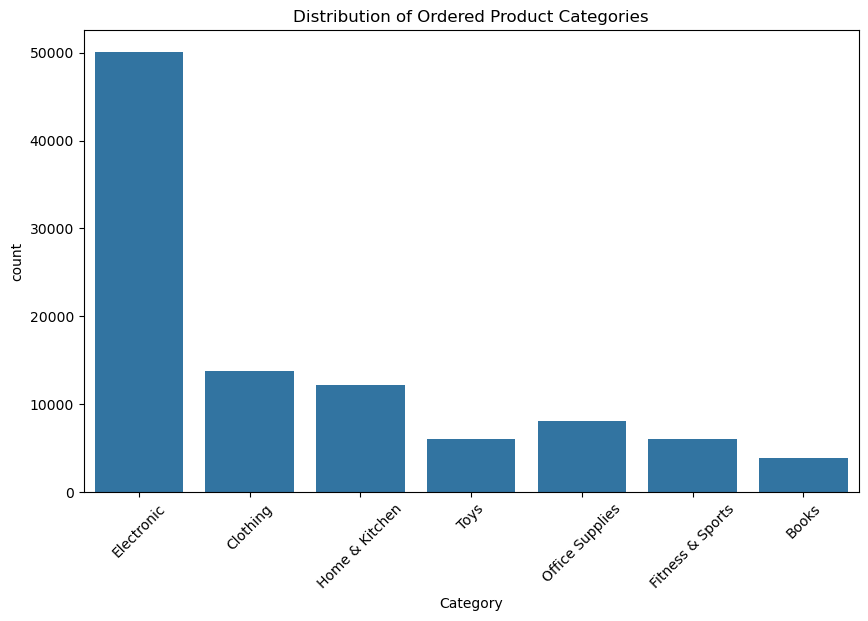

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='Category')
plt.title('Distribution of Ordered Product Categories')
plt.xticks(rotation=45)
plt.show()

An overwhelming about of the items purchased off of amazon belong in the electronic category

#### Brand

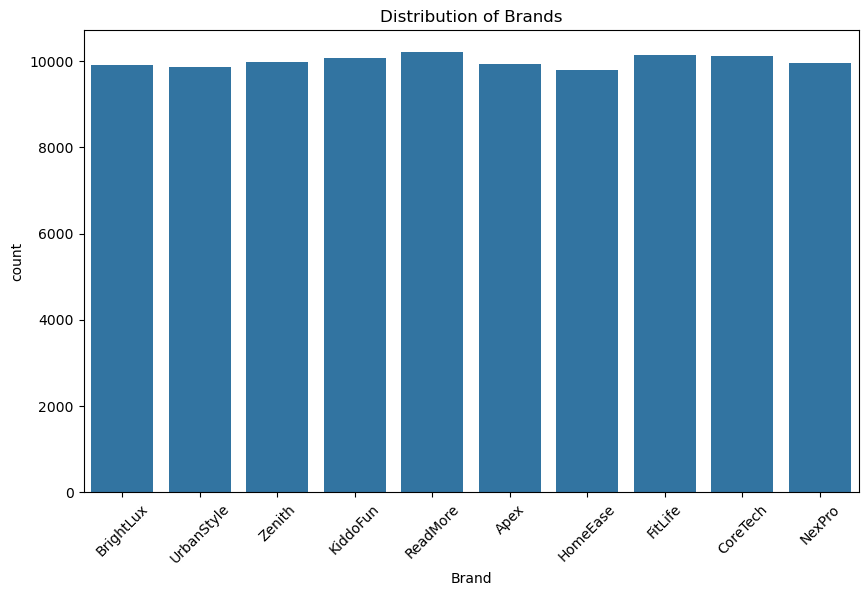

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='Brand')
plt.title('Distribution of Brands')
plt.xticks(rotation=45)
plt.show()

Looking at the Brand data, each brand is almost the same in the amount of orders they received.

#### Quantity

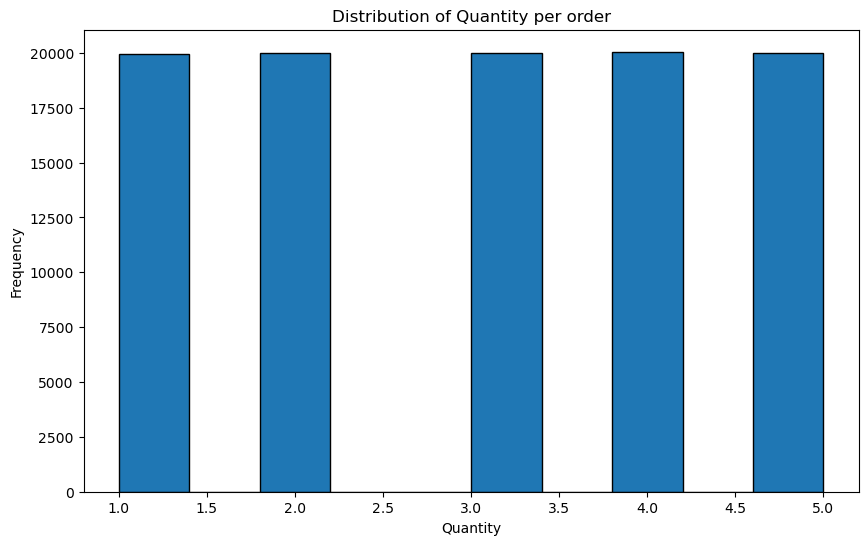

In [78]:
plt.figure(figsize=(10,6))
plt.hist(ds['Quantity'],edgecolor='black')
plt.title('Distribution of Quantity per order')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

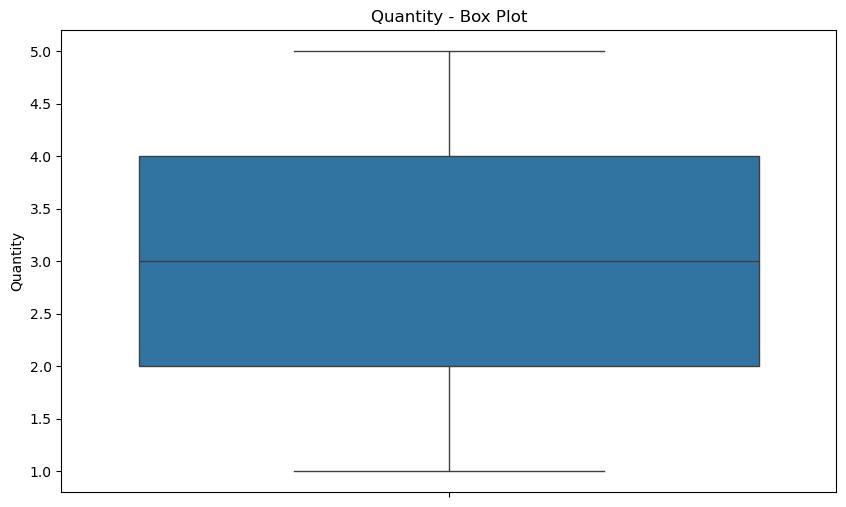

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(y=ds['Quantity'])
plt.title('Quantity - Box Plot')
plt.show()

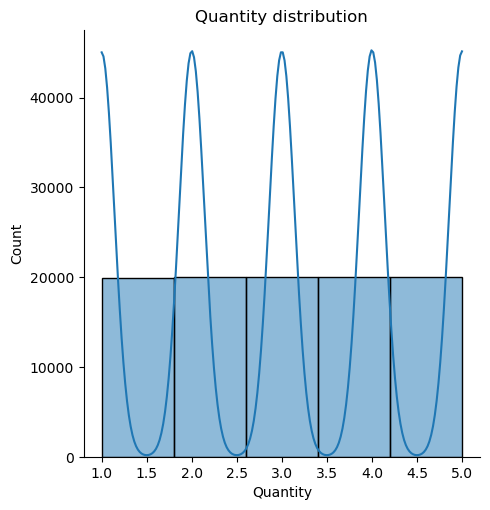

In [80]:
sns.displot(data=ds, x='Quantity', kde=True, bins =5)
plt.title ('Quantity distribution')
plt.show()

Products are equally distributed across the order. This could be a product of the data being synthetic

#### UnitPrice

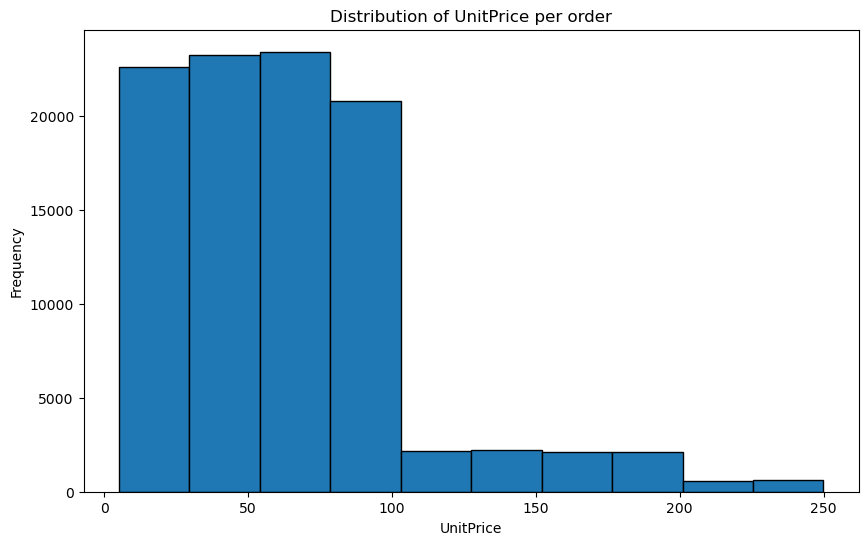

In [81]:
plt.figure(figsize=(10,6))
plt.hist(ds['UnitPrice'],edgecolor='black')
plt.title('Distribution of UnitPrice per order')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

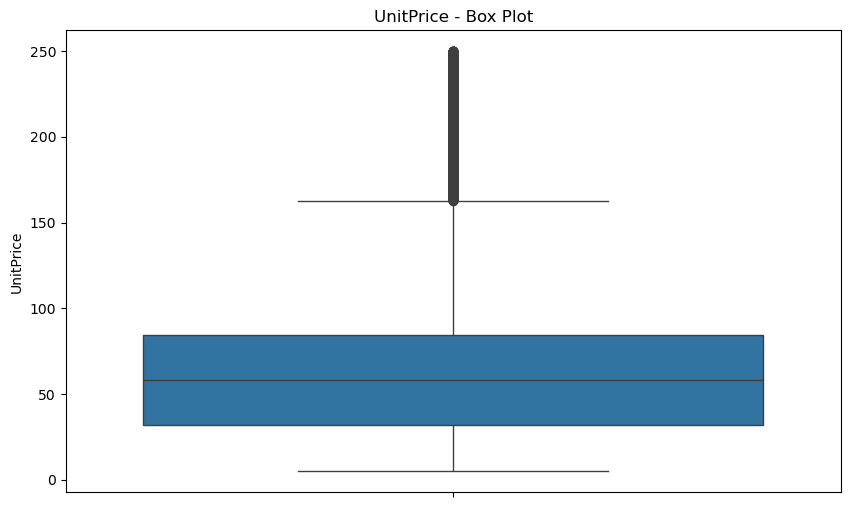

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(y=ds['UnitPrice'])
plt.title('UnitPrice - Box Plot')
plt.show()

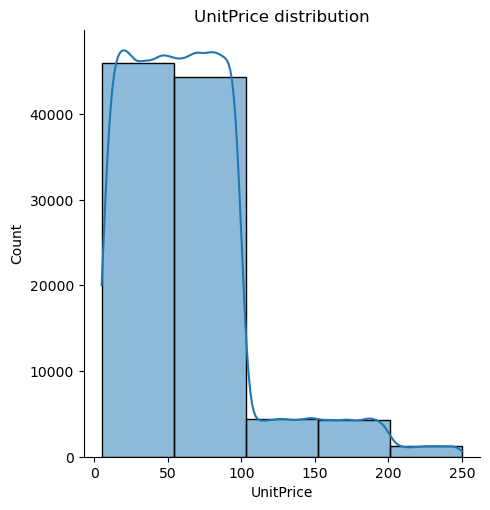

In [83]:
sns.displot(data=ds, x='UnitPrice', kde=True, bins =5)
plt.title ('UnitPrice distribution')
plt.show()

The distribution is skewed right, meaning that the average price of the items are on the lower end $0-100 and then there are few items above that threshold

#### Tax

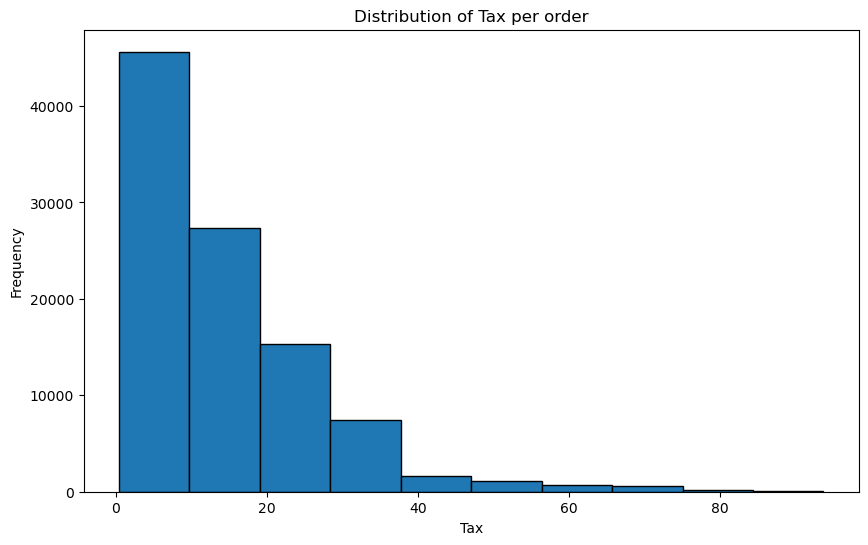

In [84]:
plt.figure(figsize=(10,6))
plt.hist(ds['Tax'],edgecolor='black')
plt.title('Distribution of Tax per order')
plt.xlabel('Tax')
plt.ylabel('Frequency')
plt.show()

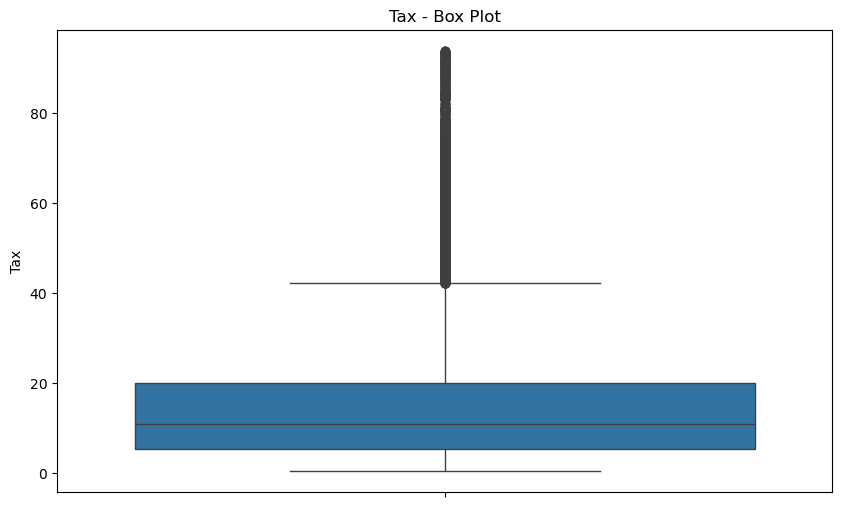

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(y=ds['Tax'])
plt.title('Tax - Box Plot')
plt.show()

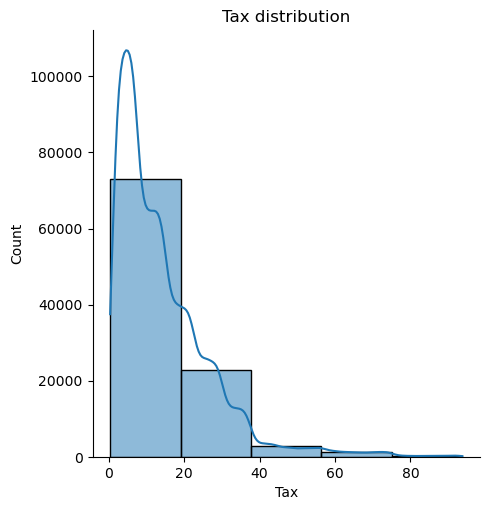

In [86]:
sns.displot(data=ds, x='Tax', kde=True, bins =5)
plt.title ('Tax distribution')
plt.show()

The distribution of tax is also skewed right. But this is inline with the formula used to calculate tax. Tax is based off the unit price * the tax rate

#### ShippingCost

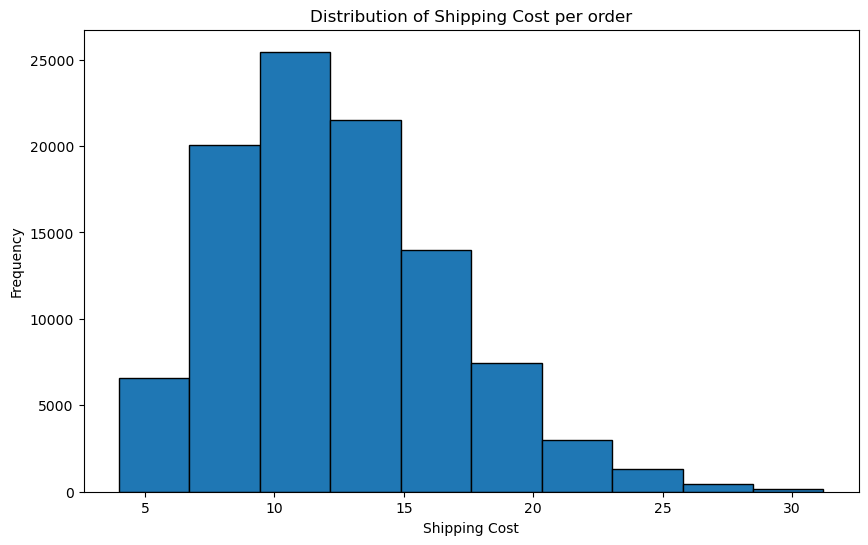

In [87]:
plt.figure(figsize=(10,6))
plt.hist(ds['ShippingCost'],edgecolor='black')
plt.title('Distribution of Shipping Cost per order')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()

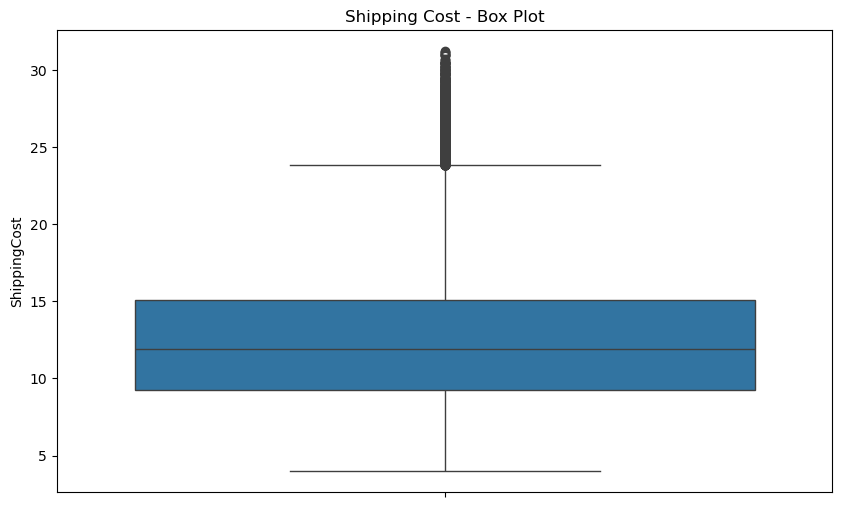

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(y=ds['ShippingCost'])
plt.title('Shipping Cost - Box Plot')
plt.show()

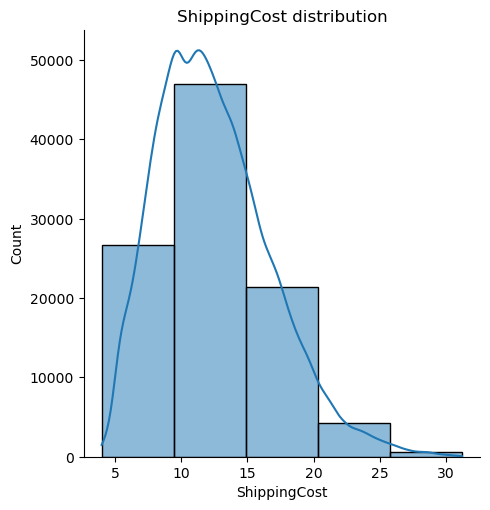

In [89]:
sns.displot(data=ds, x='ShippingCost', kde=True, bins =5)
plt.title ('ShippingCost distribution')
plt.show()

Again the distribution is skewed right. But this distribution looks gaussian compared to the others.  Some high shipping costs can be explain buy high unit prices amounts

#### TotalAmount

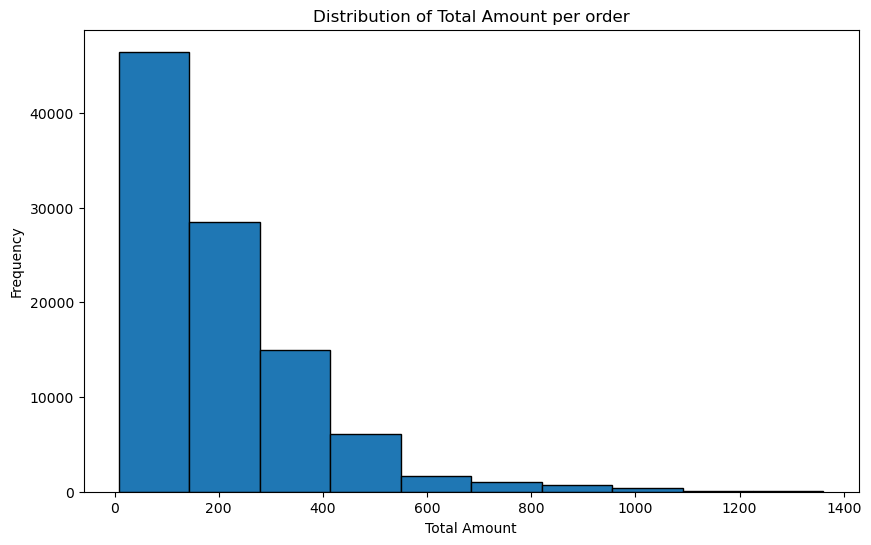

In [90]:
plt.figure(figsize=(10,6))
plt.hist(ds['TotalAmount'],edgecolor='black')
plt.title('Distribution of Total Amount per order')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

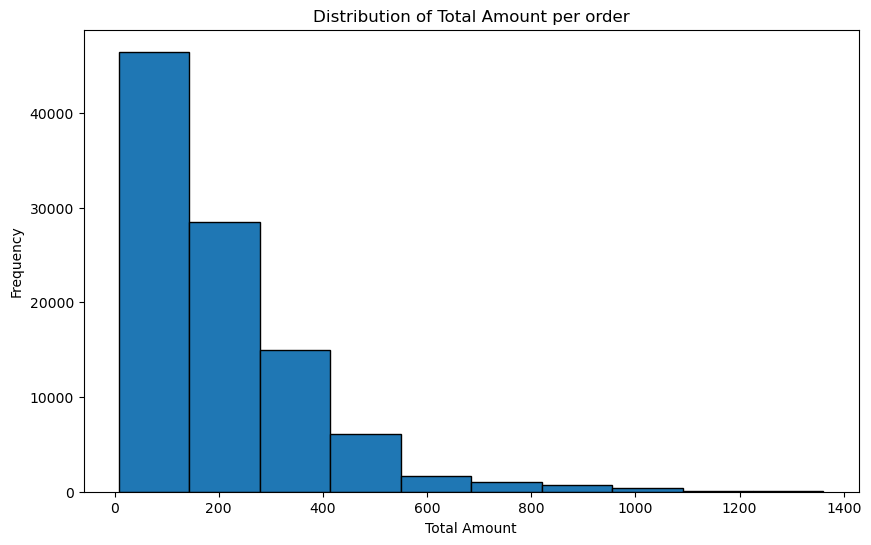

In [91]:
plt.figure(figsize=(10,6))
plt.hist(ds['TotalAmount'],edgecolor='black')
plt.title('Distribution of Total Amount per order')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

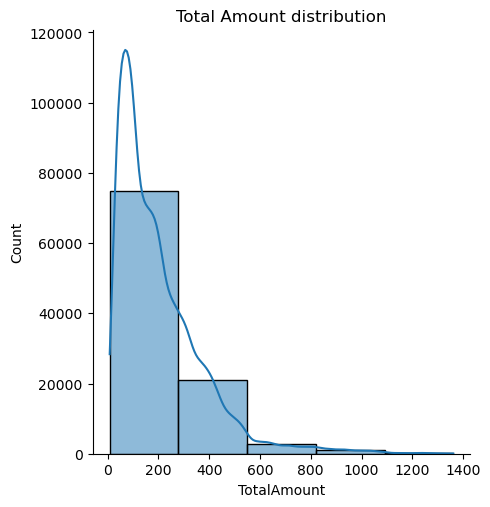

In [92]:
sns.displot(data=ds, x='TotalAmount', kde=True, bins =5)
plt.title ('Total Amount distribution')
plt.show()

There are some really expensive orders and some normal orders which makes the distributions skewed right

#### Payment Method

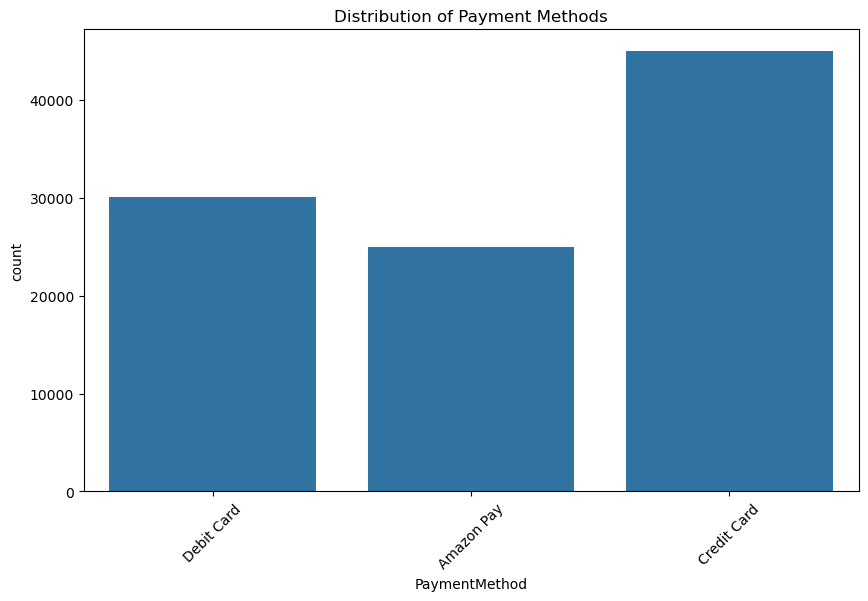

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='PaymentMethod')
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.show()

Credit card has the highest usage among amazon customers. The split is almost 30-25-45 with credit card orders being the highest and Amazon Pay being the lowest

#### Order Status

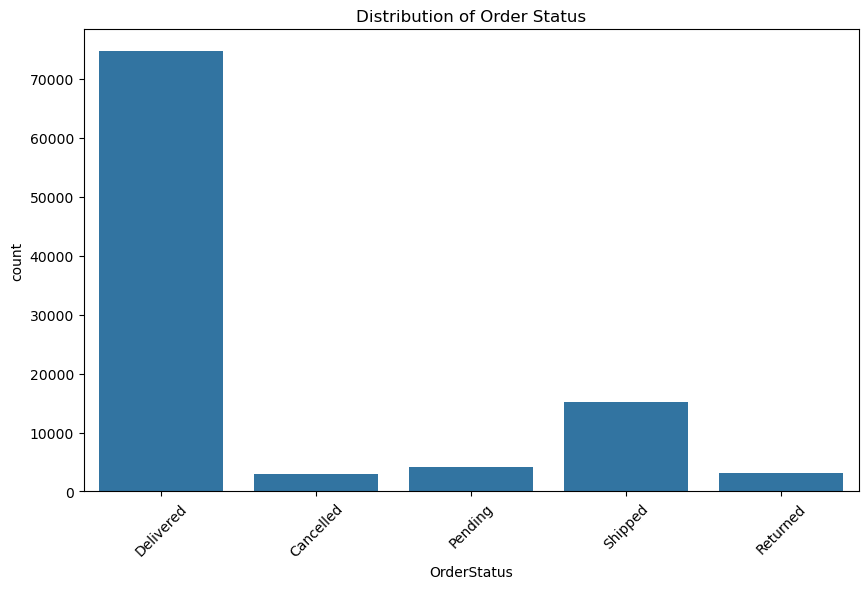

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='OrderStatus')
plt.title('Distribution of Order Status')
plt.xticks(rotation=45)
plt.show()

The distribution is way skewed in the favor of delivered status. That means majority of the customers received their items while the rest are either cancelled, return or in a throughput status

#### City

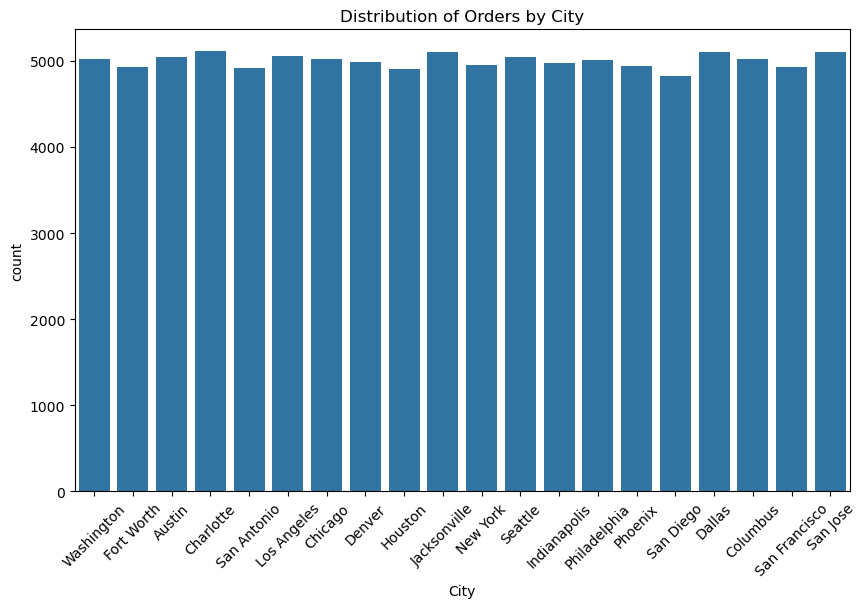

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='City')
plt.title('Distribution of Orders by City')
plt.xticks(rotation=45)
plt.show()

Orders are evenly distributed across the cities

#### State

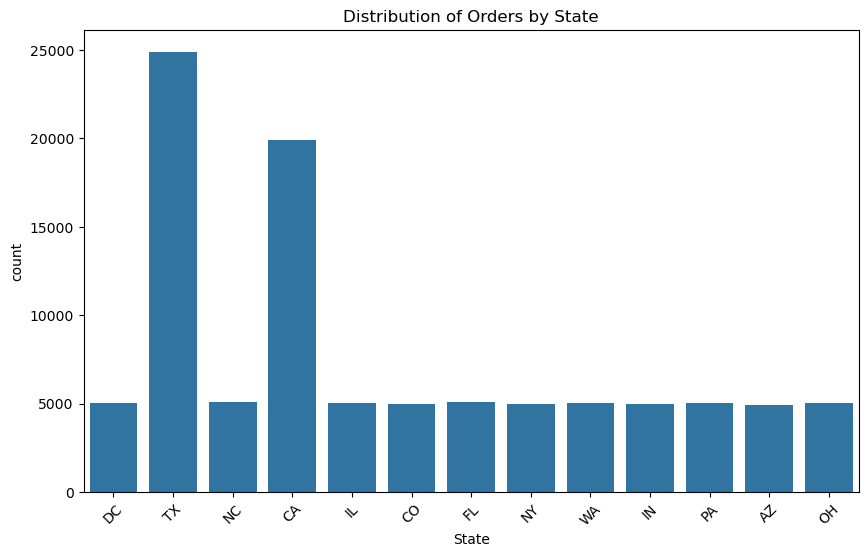

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='State')
plt.title('Distribution of Orders by State')
plt.xticks(rotation=45)
plt.show()

California and Texas have the highest orders per their state. However, since we know that the cities are equally distributed, this implys that TX and CA have more cities that Amazon ships to compared to the other states

#### Order Month

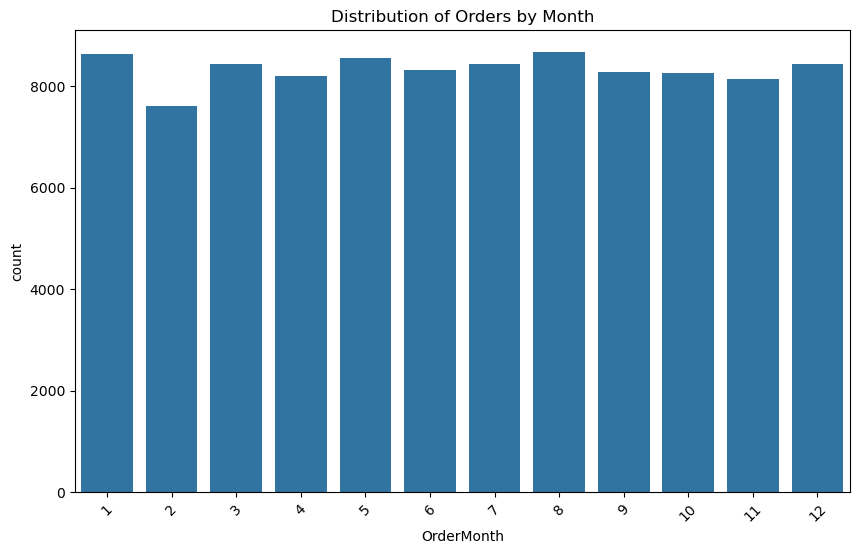

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='OrderMonth')
plt.title('Distribution of Orders by Month')
plt.xticks(rotation=45)
plt.show()

This this is interesting. I didn't expect it to be so uniform. Amazon is one of the biggest online retailers and I know this is synthetic data but I would've expected more deviations in the months

#### Order Year

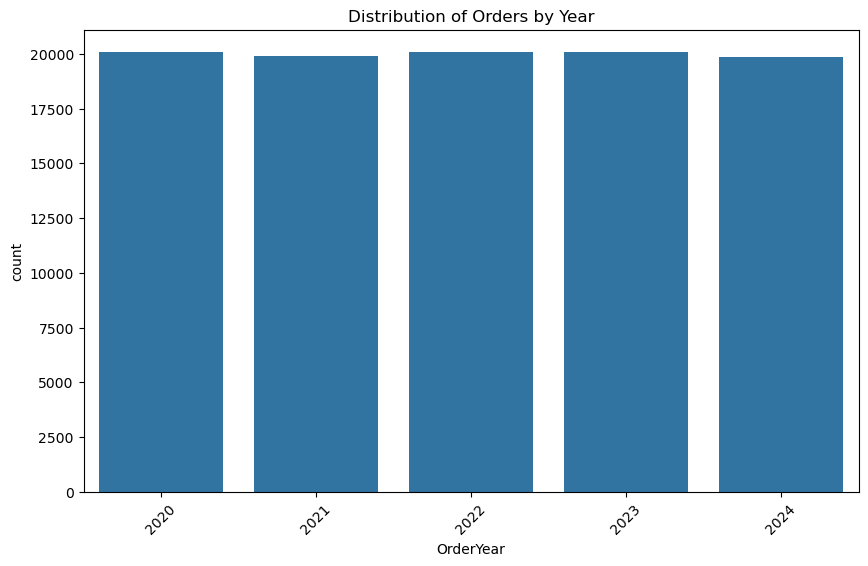

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds, x='OrderYear')
plt.title('Distribution of Orders by Year')
plt.xticks(rotation=45)
plt.show()

The distribution shows that amazon sees vary little change if any between the years

## Bivariate analysis

#### Numerics
- Quantity
- UnitPrice
- Discount
- Tax
- ShippingCost
- TotalAmount
- OrderMonth
- OrderYear

#### Categorical
- Category
- Brand
- PaymentMethod
- OrderStatus
- City
- State

#### Identifiers
- OrderID
- CustomerID
- ProductID
- CustomerName
- ProductName
- SellerID

## Numeric to Numeric

In [99]:
# Creating a numeric dictionary so I can run a heatmap to get an overview of the numeric to numeric relations
numeric_cols=['Quantity','UnitPrice','Discount','Tax','ShippingCost','TotalAmount','OrderMonth','OrderYear']

<Axes: >

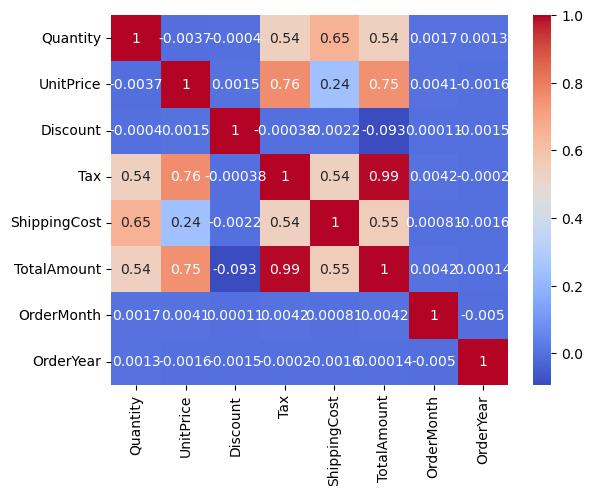

In [100]:
sns.heatmap(ds[numeric_cols].corr(),annot=True, cmap='coolwarm')

Looking at the warmer colors. Besides the diagonal line which shows the variable compared to themselves, the following colors have a warm (Positive relationship).

- Quantity and tax (Does the quantity affect the tax paid)
- Quantity and shipping cost (Does the quantity affect the shipping cost)
- Quantity and Total Amount (Does the quantity affect the total amount)


- Unit Price and Tax (Does the unit price affect the tax rate)
- Unit price and Total Amount (Does the unit price affect the total amount)

- Tax and shipping cost (Is tax affected by shipping costs)
- Tax and Total Amount (Does tax affect the total amount)

- Shipping cost and Total Amount (Does shipping cost affect the total amount)

#### Quantity vs Tax

<Axes: xlabel='Quantity', ylabel='Tax'>

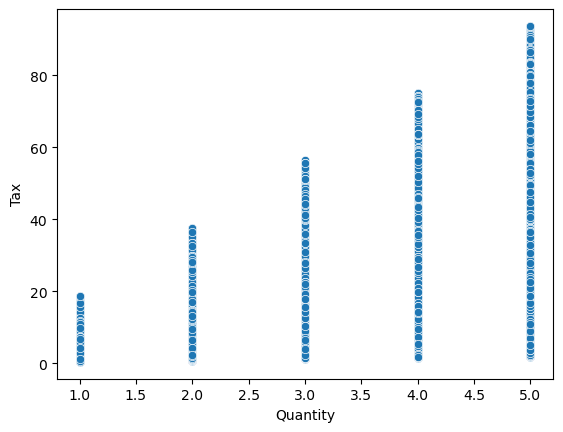

In [101]:
sns.scatterplot(data=ds, x='Quantity', y='Tax')

The scatterplot shows that as the tax quantity increase the tax rate increases as well.

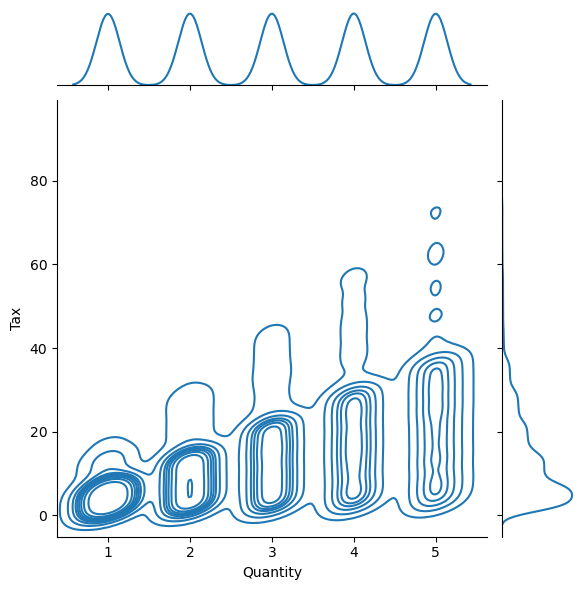

In [102]:
sns.jointplot(data=ds, x='Quantity',y='Tax', kind='kde')

When there is a smaller amount of items ordered the tax is more dense. However, as the quantity increases the density of tax cost becomes more sparse

<Axes: xlabel='Quantity', ylabel='Tax'>

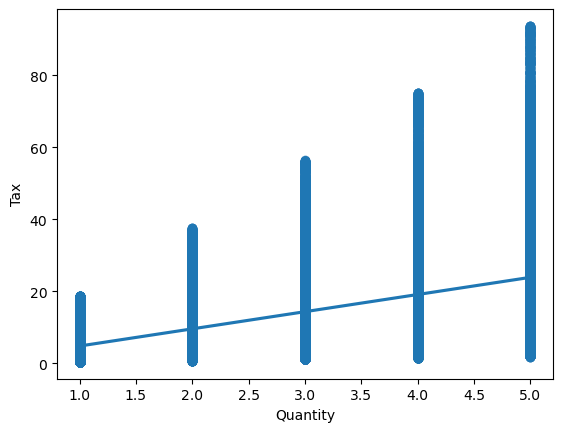

In [103]:
sns.regplot(data=ds,x='Quantity', y='Tax')

Looking at the regression plot. There is a positive trend lend showing that as quantity increases, tax increases as well

#### Quantity vs shippingcost

<Axes: xlabel='Quantity', ylabel='ShippingCost'>

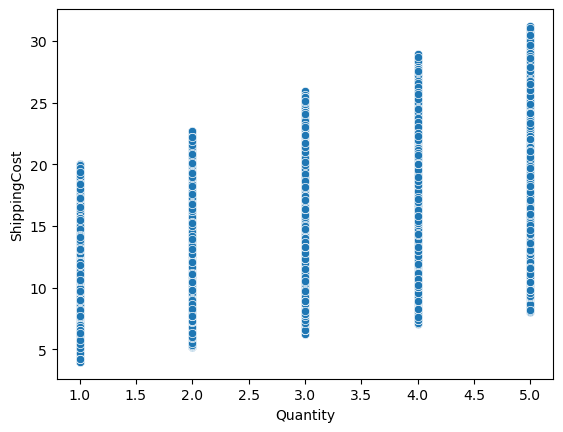

In [104]:
sns.scatterplot(data=ds, x='Quantity', y='ShippingCost')

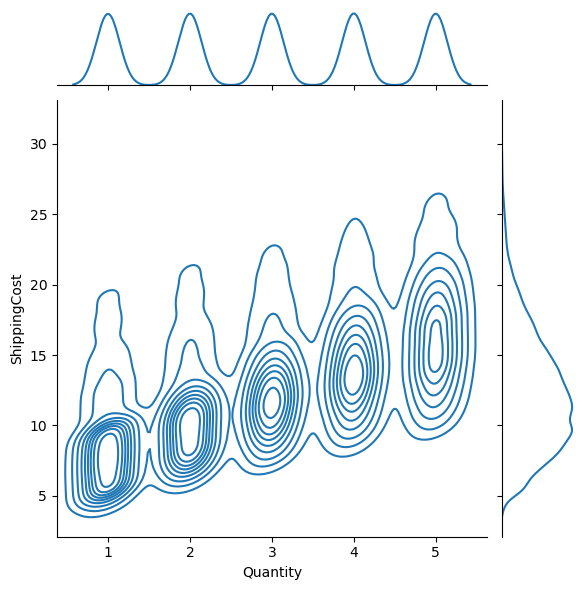

In [105]:
sns.jointplot(data=ds, x='Quantity',y='ShippingCost', kind='kde')

<Axes: xlabel='Quantity', ylabel='ShippingCost'>

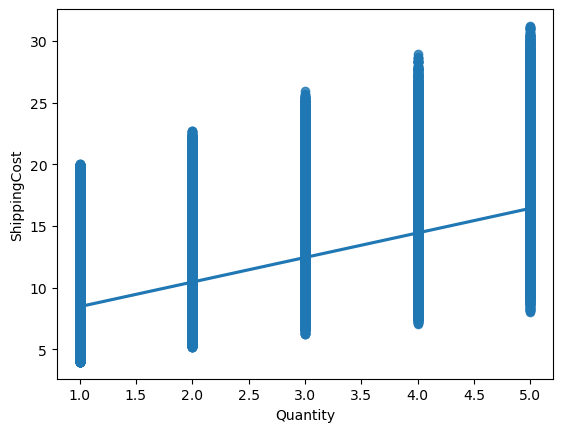

In [106]:
sns.regplot(data=ds,x='Quantity', y='ShippingCost')

Quantity and shippingcost share a positive trend. This however, isn't suprising due to the fact shippingcost is calculated by a base rate and then there is additional shipping costs for additional items

#### Quantity and TotalAmount

<Axes: xlabel='Quantity', ylabel='TotalAmount'>

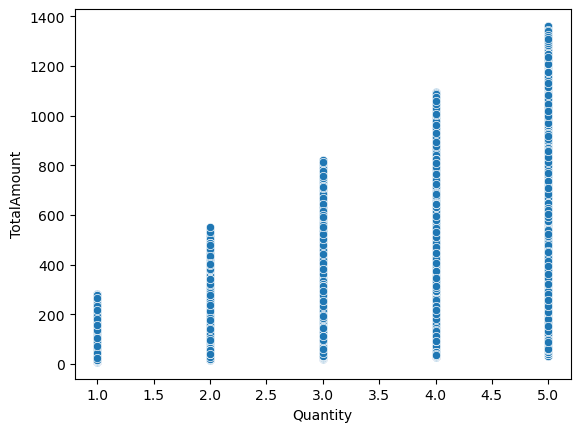

In [107]:
sns.scatterplot(data=ds, x='Quantity', y='TotalAmount')

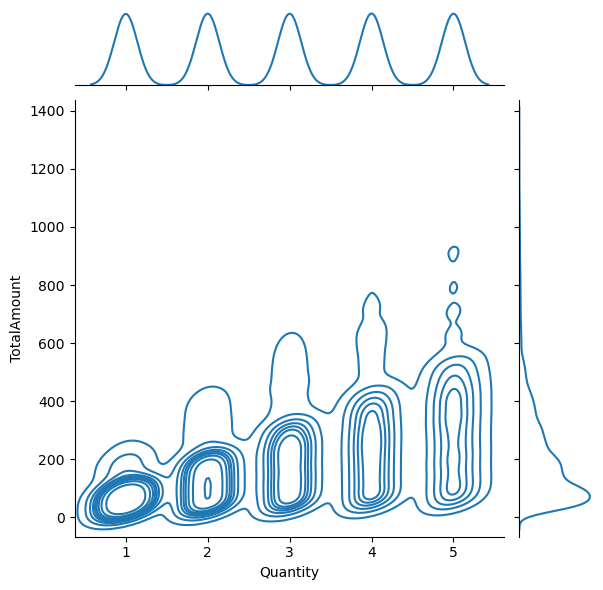

In [108]:
sns.jointplot(data=ds, x='Quantity',y='TotalAmount', kind='kde')

<Axes: xlabel='Quantity', ylabel='TotalAmount'>

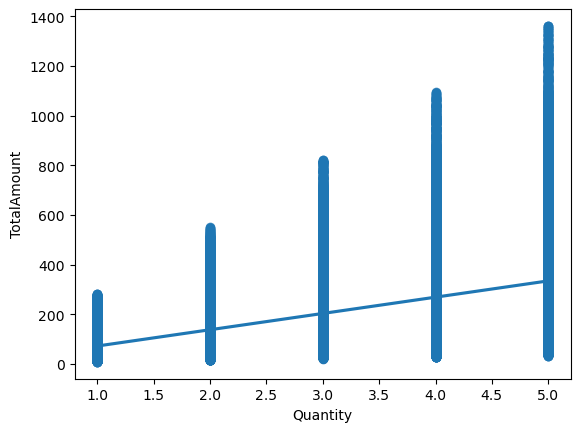

In [109]:
sns.regplot(data=ds,x='Quantity', y='TotalAmount')

The quantity to totalamount relationship isn't suprising either. The totalamount calcuation included quantity * unitprice so the fact that there is a correlation makes sense

#### UnitPrice and Tax

<Axes: xlabel='UnitPrice', ylabel='Tax'>

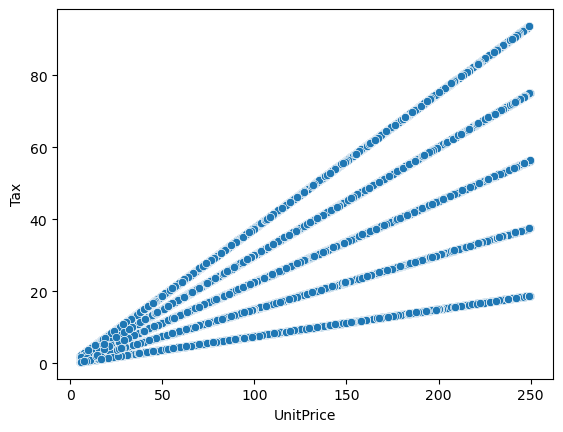

In [110]:
sns.scatterplot(data=ds, x='UnitPrice', y='Tax')

So initially I thought this scatterplot looked very off. Based off the fact that the tax rate is a constant rate of 7.52%. However, once I double checked the formula it made a little more sense why there are 5 different lines.
The reason behind this is because Tax is calculated by the unit price * quantity * taxrate. The reason there are 5 lines is because there are 5 differenent quantities for unit price being accounted for.

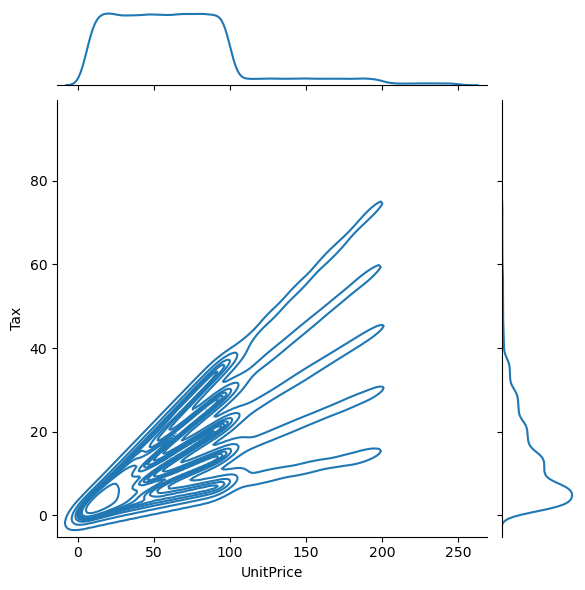

In [111]:
sns.jointplot(data=ds, x='UnitPrice',y='Tax', kind='kde')

<Axes: xlabel='UnitPrice', ylabel='Tax'>

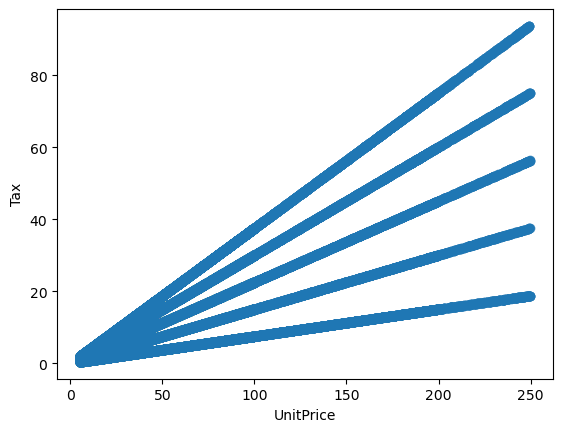

In [112]:
sns.regplot(data=ds,x='UnitPrice', y='Tax')

#### Unit Price vs TotalAmount

<Axes: xlabel='UnitPrice', ylabel='TotalAmount'>

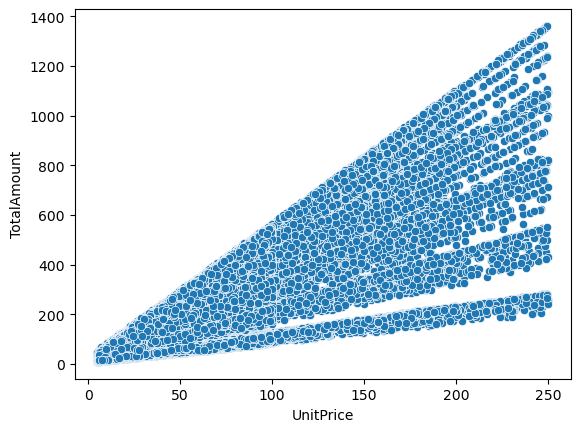

In [113]:
sns.scatterplot(data=ds, x='UnitPrice', y='TotalAmount')

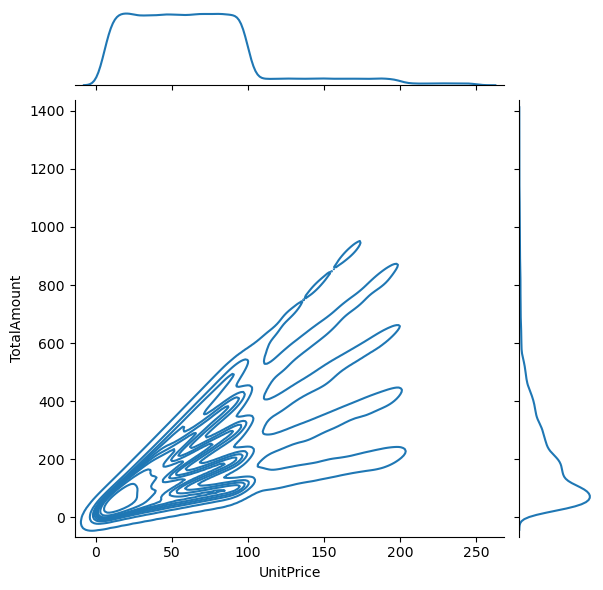

In [114]:
sns.jointplot(data=ds, x='UnitPrice',y='TotalAmount', kind='kde')

<Axes: xlabel='UnitPrice', ylabel='TotalAmount'>

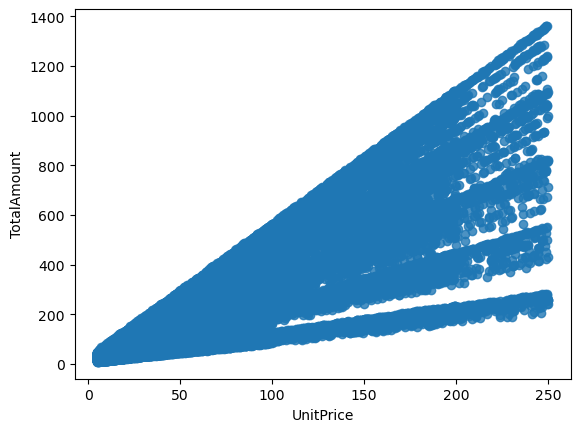

In [115]:
sns.regplot(data=ds,x='UnitPrice', y='TotalAmount')

The graphs show that as the unit price increases the total order amount increases

#### Tax vs ShippingCost

<Axes: xlabel='Tax', ylabel='ShippingCost'>

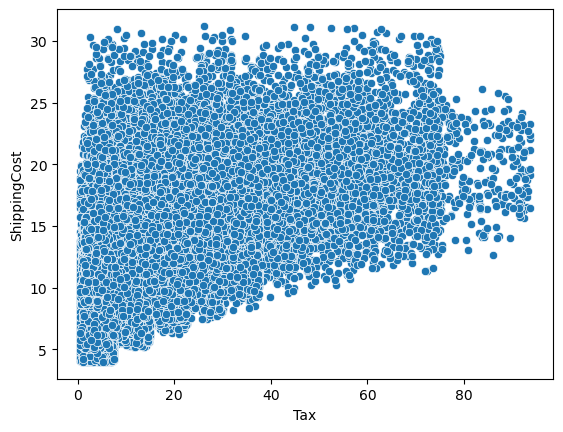

In [116]:
sns.scatterplot(data=ds, x='Tax', y='ShippingCost')

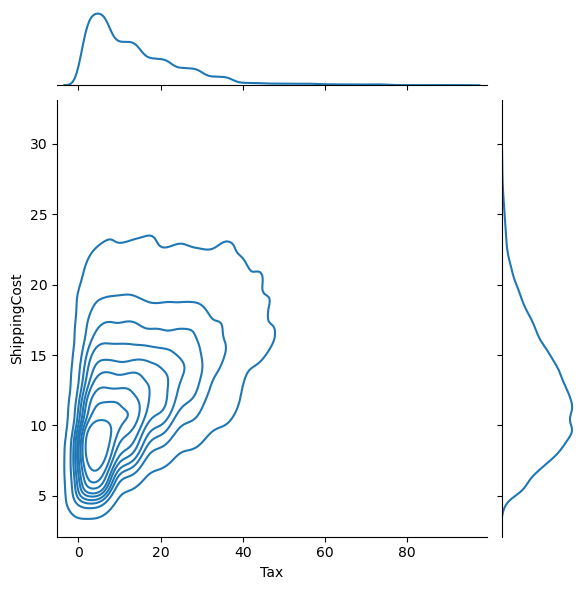

In [117]:
sns.jointplot(data=ds, x='Tax',y='ShippingCost', kind='kde')

<Axes: xlabel='Tax', ylabel='ShippingCost'>

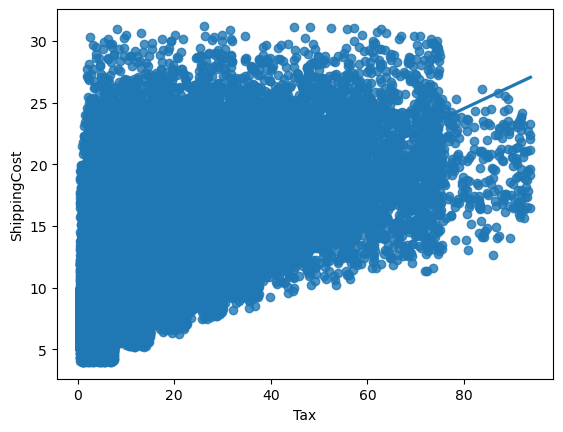

In [118]:
sns.regplot(data=ds,x='Tax', y='ShippingCost')

So from what I am seeing from the visuals, tax is usually with higher shipping costs. However, there is no clear trend. The reason behind this is because you can buy multiple low ticket items and have a lower tax but still have a higher shipping costs due to the combined shipping.

#### Tax vs TotalAmount

<Axes: xlabel='Tax', ylabel='TotalAmount'>

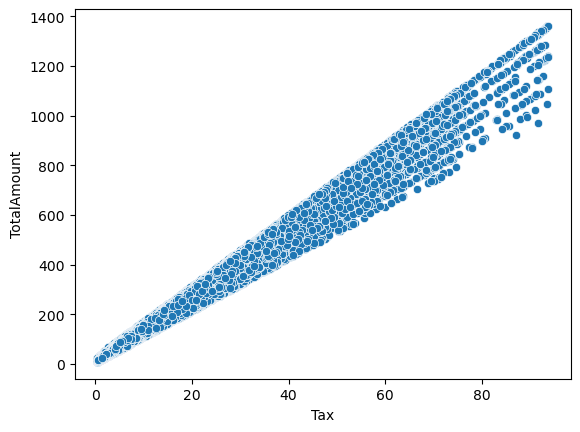

In [119]:
sns.scatterplot(data=ds, x='Tax', y='TotalAmount')

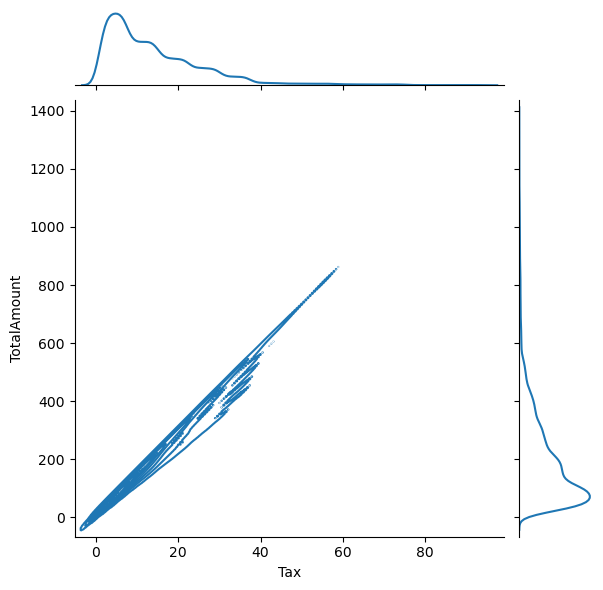

In [120]:
sns.jointplot(data=ds, x='Tax',y='TotalAmount', kind='kde')

<Axes: xlabel='Tax', ylabel='TotalAmount'>

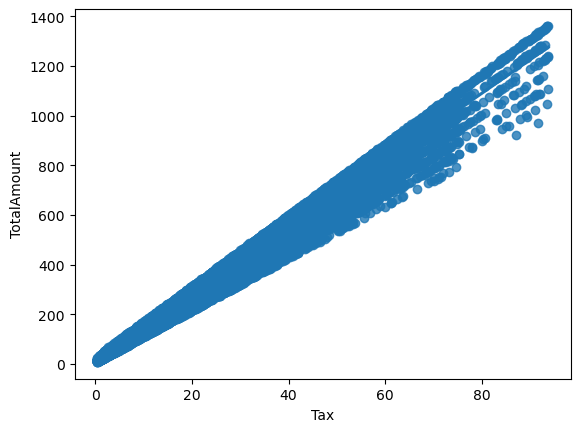

In [121]:
sns.regplot(data=ds,x='Tax', y='TotalAmount')

There is a strong positive correlation between total amount and tax. As The total order amount rises so does the tax rate.

#### ShippingCost vs TotalAmount

<Axes: xlabel='ShippingCost', ylabel='TotalAmount'>

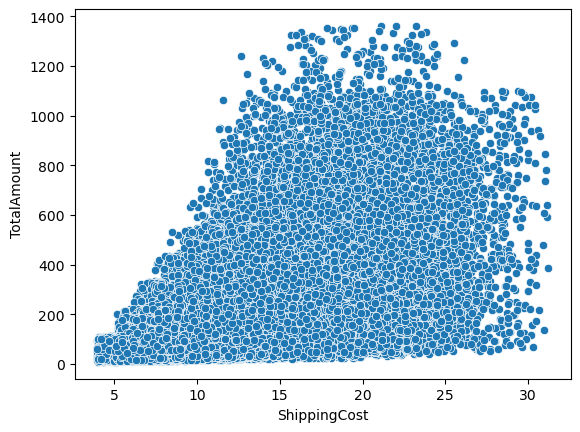

In [122]:
sns.scatterplot(data=ds, x='ShippingCost', y='TotalAmount')

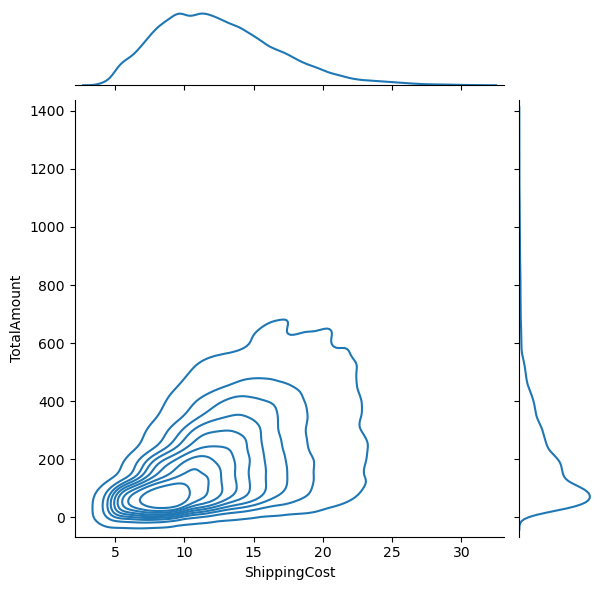

In [123]:
sns.jointplot(data=ds, x='ShippingCost',y='TotalAmount', kind='kde')

<Axes: xlabel='ShippingCost', ylabel='TotalAmount'>

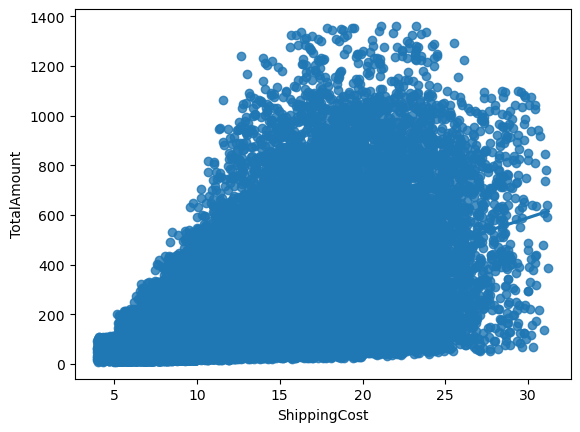

In [124]:
sns.regplot(data=ds,x='ShippingCost', y='TotalAmount')

From the visualizations, the relationships between totalamount and shippingcosts is not the strongest. This might be something to look at by including quantity. Including quantity will most likely show a relationships as higher quantity orders tend to have higher shipping costs just based on the formula

## Categoric to Numeric

#### Category vs TotalAmount

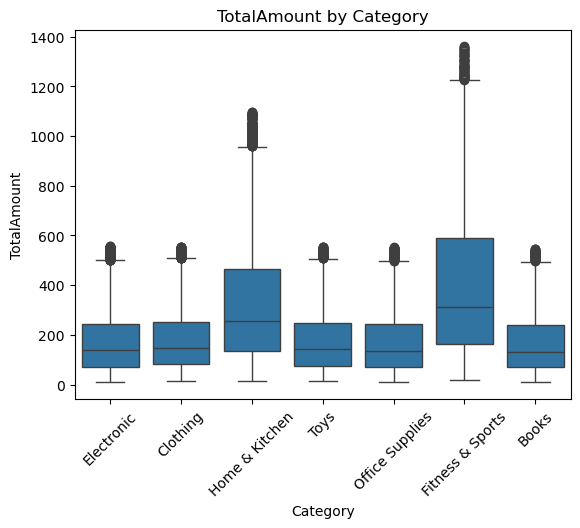

In [125]:
sns.boxplot(data=ds,x='Category', y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by Category")
plt.show()

Looking at the boxplot. Almost all the categories distributions are the same except Home & Kitchen and Fitness & Sports. 
Home & Kitchen and Fitness & Sports have some really expensive orders compared to the rest of the categories which make the whiskers longer. 

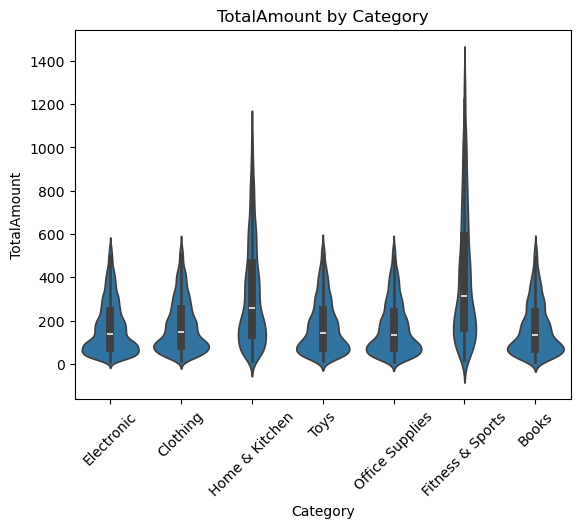

In [126]:
sns.violinplot(data=ds,x='Category',y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by Category")
plt.show()

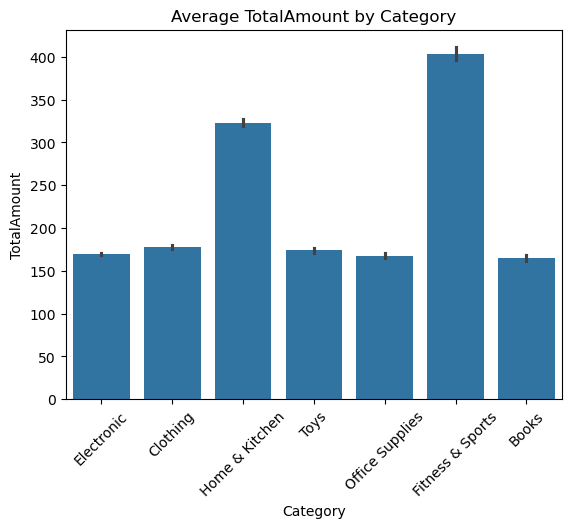

In [127]:
sns.barplot(data=ds, x='Category', y='TotalAmount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average TotalAmount by Category")
plt.show()

In [128]:
ds.groupby('Category')['TotalAmount'].describe()

count        mean         std    min       25%      50%  \
Category                                                                      
Books              3876.0  164.678431  119.450598  10.22   69.7150  131.455   
Clothing          13772.0  177.742620  119.282987  13.86   81.9200  147.335   
Electronic        50041.0  169.419772  120.989440   9.60   71.9400  137.110   
Fitness & Sports   6072.0  403.620748  300.984087  19.45  163.7475  313.895   
Home & Kitchen    12178.0  323.172795  237.207373  14.99  134.3900  256.355   
Office Supplies    8053.0  167.850533  121.228039   8.25   71.0200  134.570   
Toys               6008.0  174.103013  122.351699  12.43   75.3250  143.515   

                       75%      max  
Category                             
Books             240.1600   546.64  
Clothing          252.6625   555.45  
Electronic        243.9800   556.35  
Fitness & Sports  588.5325  1360.89  
Home & Kitchen    463.7300  1097.85  
Office Supplies   241.9200   551.65  
Toys              248.3300   553.86

Looking at the statistical summary of totalamounts grouped by category. You can see the average total amount of a category is 120 give or take a couple dollars. Then compared to Fitness & SPorts and Home & Kitchen the orders are much more expensive by $100 +

#### Category vs UnitPrice

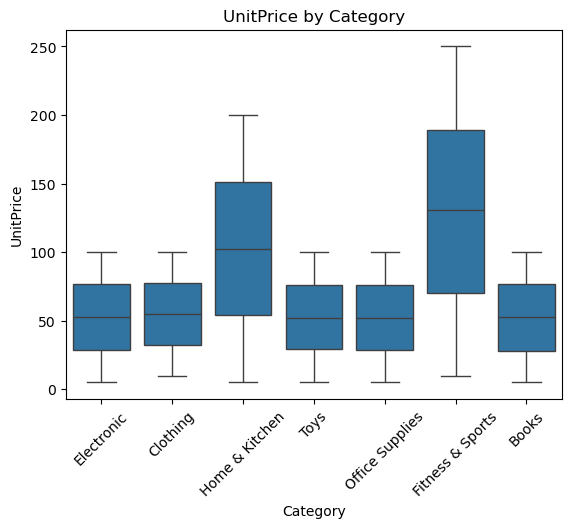

In [129]:
sns.boxplot(data=ds,x='Category', y='UnitPrice')
plt.xticks(rotation=45)
plt.title("UnitPrice by Category")
plt.show()

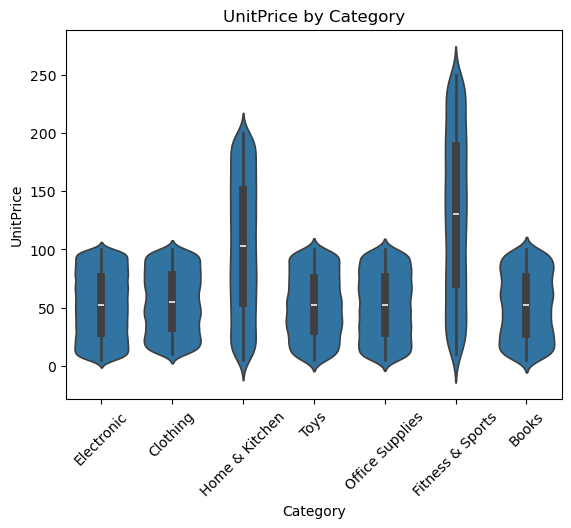

In [130]:
sns.violinplot(data=ds,x='Category',y='UnitPrice')
plt.xticks(rotation=45)
plt.title("UnitPrice by Category")
plt.show()

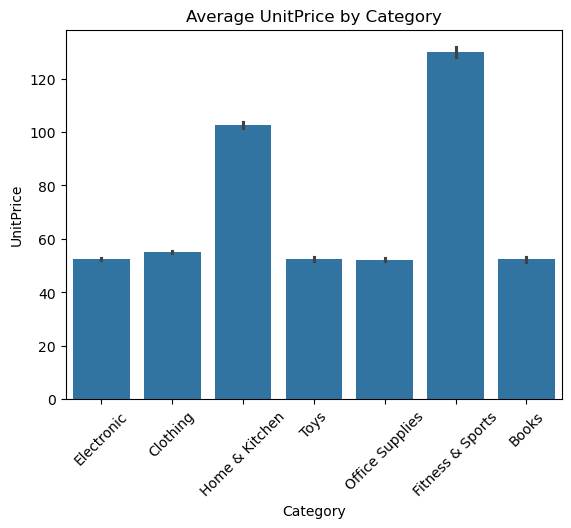

In [131]:
sns.barplot(data=ds, x='Category', y='UnitPrice', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average UnitPrice by Category")
plt.show()

In [132]:
ds.groupby('Category')['UnitPrice'].describe()

count        mean        std    min      25%      50%  \
Category                                                                    
Books              3876.0   52.343790  27.750384   5.04  27.7675   52.570   
Clothing          13772.0   55.141003  26.045181  10.01  32.4775   54.970   
Electronic        50041.0   52.528046  27.482081   5.00  28.6400   52.620   
Fitness & Sports   6072.0  129.995333  69.271529  10.01  70.1950  130.660   
Home & Kitchen    12178.0  102.603019  56.224010   5.02  54.2125  102.615   
Office Supplies    8053.0   52.246958  27.520672   5.01  28.3600   52.220   
Toys               6008.0   52.493480  27.098223   5.01  29.7525   52.175   

                       75%     max  
Category                            
Books              76.5325  100.00  
Clothing           77.8100  100.00  
Electronic         76.4300  100.00  
Fitness & Sports  188.8550  249.96  
Home & Kitchen    151.0025  199.99  
Office Supplies    76.1000  100.00  
Toys               75.7825   99.99

The unit price per category follows the same trend as total price per category with fitness & sports and home & kitchen being higher compared to the rest of the categories. The other categories are more dense while fitness & sports and home & kitchen are more sparse

#### Category vs Quantity

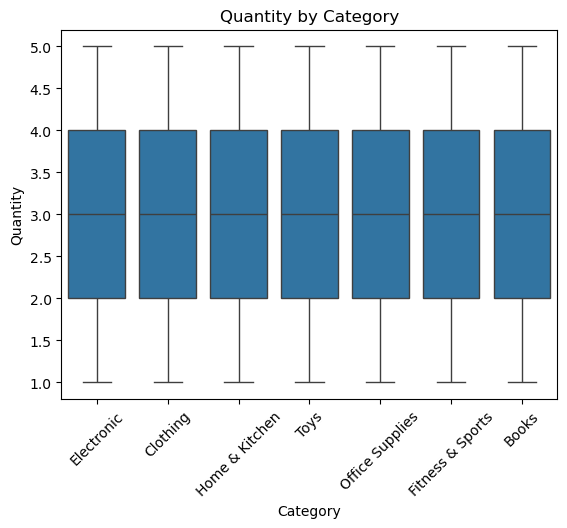

In [133]:
sns.boxplot(data=ds,x='Category', y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity by Category")
plt.show()

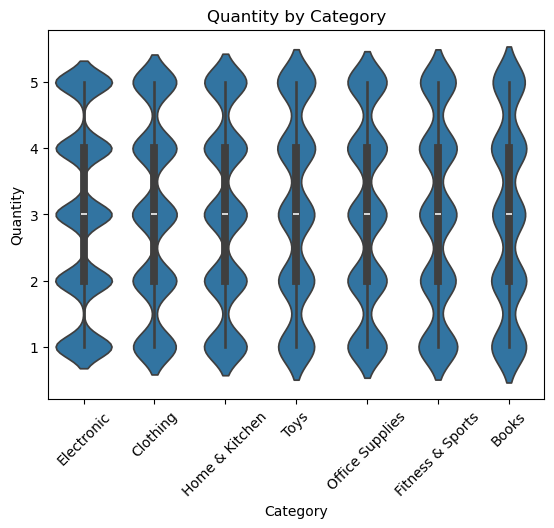

In [134]:
sns.violinplot(data=ds,x='Category',y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity by Category")
plt.show()

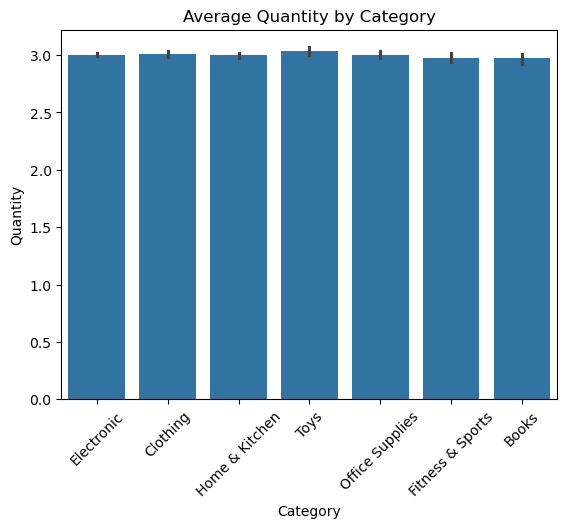

In [135]:
sns.barplot(data=ds, x='Category', y='Quantity', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Quantity by Category")
plt.show()

In [136]:
ds.groupby('Category')['Quantity'].describe()

count      mean       std  min  25%  50%  75%  max
Category                                                              
Books              3876.0  2.970330  1.409423  1.0  2.0  3.0  4.0  5.0
Clothing          13772.0  3.008568  1.407342  1.0  2.0  3.0  4.0  5.0
Electronic        50041.0  3.002258  1.414925  1.0  2.0  3.0  4.0  5.0
Fitness & Sports   6072.0  2.976943  1.416819  1.0  2.0  3.0  4.0  5.0
Home & Kitchen    12178.0  2.995976  1.411970  1.0  2.0  3.0  4.0  5.0
Office Supplies    8053.0  3.002732  1.414211  1.0  2.0  3.0  4.0  5.0
Toys               6008.0  3.031791  1.417795  1.0  2.0  3.0  4.0  5.0

Looks like Quantity by category doesn't provide too much as the data is almost identical across all categories

#### Brand vs UnitPrice

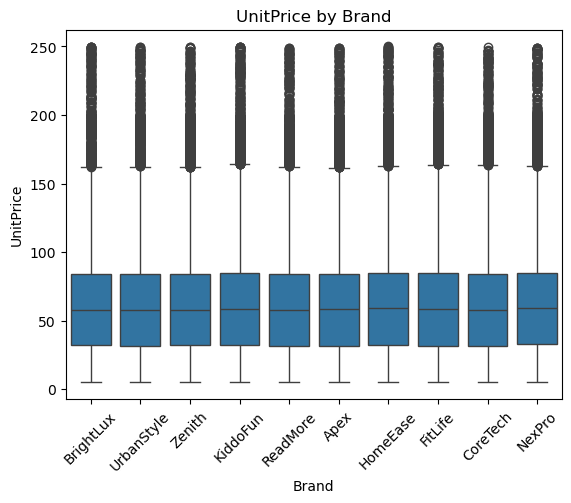

In [137]:
sns.boxplot(data=ds,x='Brand', y='UnitPrice')
plt.xticks(rotation=45)
plt.title("UnitPrice by Brand")
plt.show()

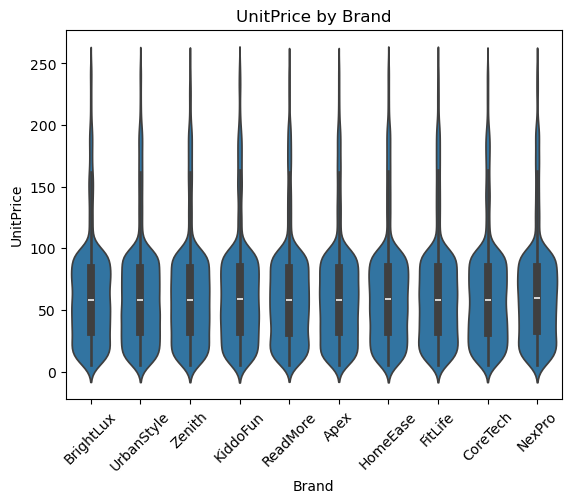

In [138]:
sns.violinplot(data=ds,x='Brand',y='UnitPrice')
plt.xticks(rotation=45)
plt.title("UnitPrice by Brand")
plt.show()

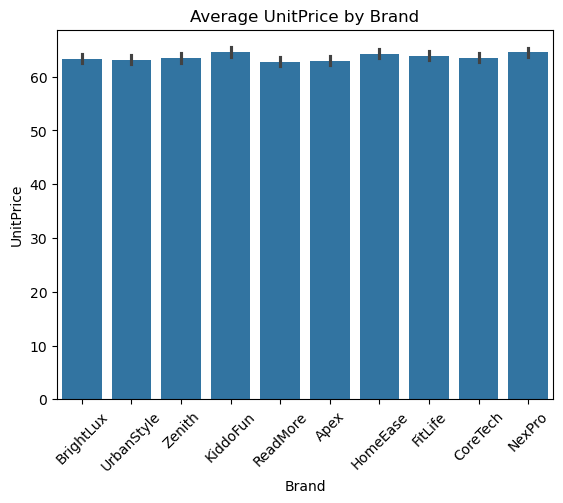

In [139]:
sns.barplot(data=ds, x='Brand', y='UnitPrice', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average UnitPrice by Brand")
plt.show()

In [140]:
ds.groupby('Brand')['UnitPrice'].describe()

count       mean        std   min     25%     50%     75%  \
Brand                                                                     
Apex         9937.0  62.981038  41.868143  5.02  31.870  58.320  83.830   
BrightLux    9907.0  63.384910  42.280843  5.00  32.255  58.000  84.195   
CoreTech    10127.0  63.546763  42.872759  5.01  31.550  57.960  84.455   
FitLife     10147.0  63.892063  43.272075  5.01  31.735  58.330  84.550   
HomeEase     9795.0  64.197181  43.181828  5.02  32.375  59.000  84.625   
KiddoFun    10077.0  64.562525  43.722455  5.00  32.480  58.650  85.140   
NexPro       9962.0  64.550184  43.080057  5.01  32.745  59.480  84.770   
ReadMore    10204.0  62.819502  41.950003  5.01  31.540  57.830  83.790   
UrbanStyle   9854.0  63.194967  42.510996  5.00  31.865  57.745  84.080   
Zenith       9990.0  63.459581  42.910846  5.01  32.040  58.080  84.000   

               max  
Brand               
Apex        249.19  
BrightLux   249.90  
CoreTech    249.35  
FitLife     249.90  
HomeEase    249.96  
KiddoFun    249.92  
NexPro      249.15  
ReadMore    249.22  
UrbanStyle  249.76  
Zenith      249.35

There isn't any differences between price and brands. I believe this has to do with the fact that the synthetic data as adjust to have more realism

#### Brand vs TotalAmount

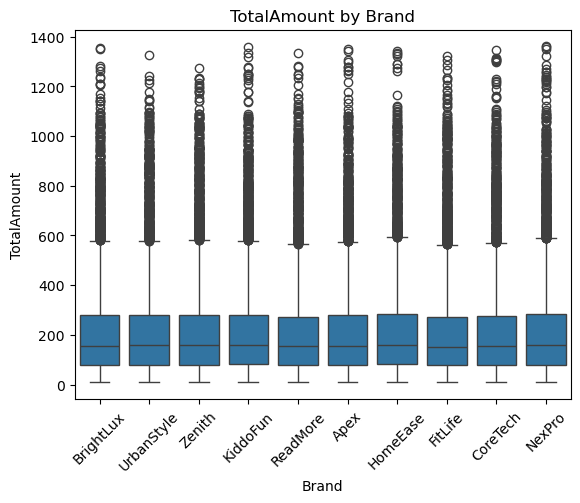

In [141]:
sns.boxplot(data=ds,x='Brand', y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by Brand")
plt.show()

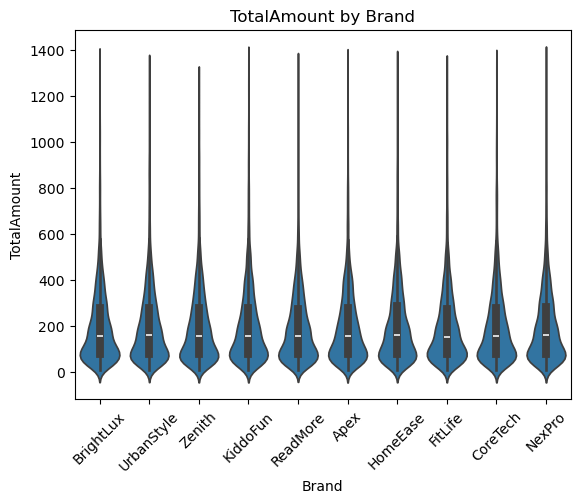

In [142]:
sns.violinplot(data=ds,x='Brand',y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by Brand")
plt.show()

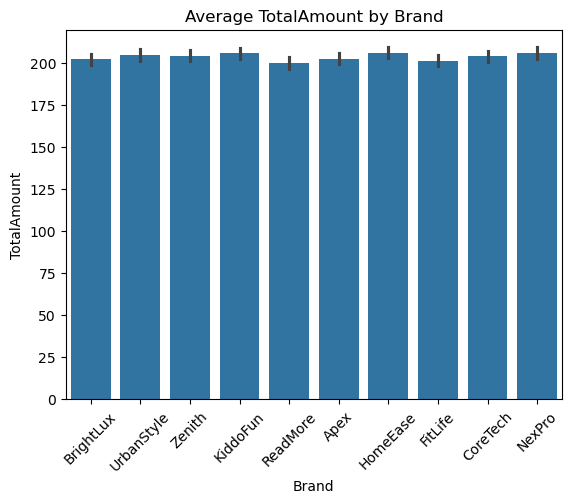

In [143]:
sns.barplot(data=ds, x='Brand', y='TotalAmount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average TotalAmount by Brand")
plt.show()

In [144]:
ds.groupby('Brand')['TotalAmount'].describe()

count        mean         std    min      25%      50%  \
Brand                                                                  
Apex         9937.0  202.404197  168.433401   8.25  80.5400  155.780   
BrightLux    9907.0  201.956983  169.669116  10.09  80.3600  155.590   
CoreTech    10127.0  203.704522  173.025885  10.03  80.2550  156.400   
FitLife     10147.0  201.148144  171.332565   9.60  80.3200  152.580   
HomeEase     9795.0  205.799944  172.318485  10.58  80.6650  159.850   
KiddoFun    10077.0  205.482594  173.268089  10.11  80.7800  157.460   
NexPro       9962.0  205.771546  173.293282  10.29  80.5600  159.185   
ReadMore    10204.0  200.094691  168.128504  10.66  79.0425  155.995   
UrbanStyle   9854.0  204.440108  169.666929  10.30  80.6575  159.680   
Zenith       9990.0  204.151803  173.400140  10.43  78.3650  157.905   

                 75%      max  
Brand                          
Apex        278.5900  1350.68  
BrightLux   280.2550  1353.66  
CoreTech    276.9050  1346.24  
FitLife     273.7350  1322.65  
HomeEase    285.5600  1341.62  
KiddoFun    280.4900  1359.92  
NexPro      283.8950  1360.89  
ReadMore    273.4700  1334.32  
UrbanStyle  279.8225  1325.56  
Zenith      279.9675  1274.18

Customers are not discriminate when ordering by brand,

#### PaymentMethod vs TotalAmount

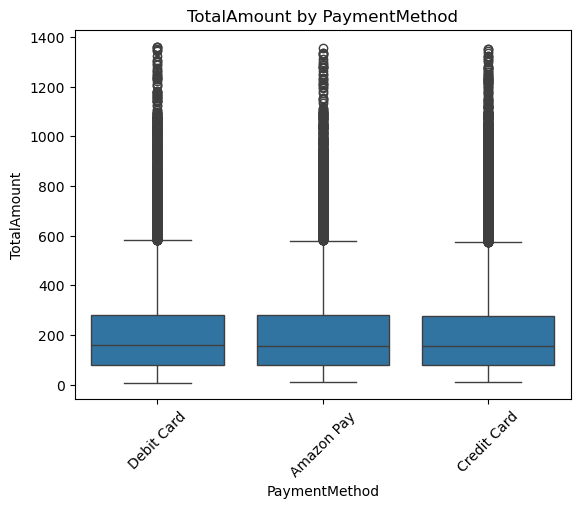

In [145]:
sns.boxplot(data=ds,x='PaymentMethod', y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by PaymentMethod")
plt.show()

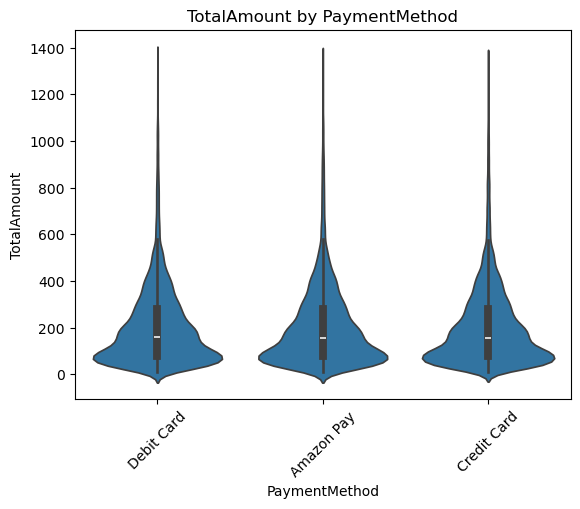

In [146]:
sns.violinplot(data=ds,x='PaymentMethod',y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by PaymentMethod")
plt.show()

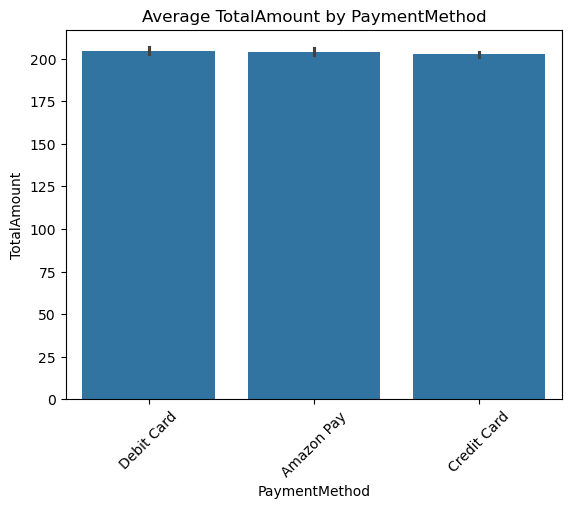

In [147]:
sns.barplot(data=ds, x='PaymentMethod', y='TotalAmount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average TotalAmount by PaymentMethod")
plt.show()

In [148]:
ds.groupby('PaymentMethod')['TotalAmount'].describe()

count        mean         std    min    25%     50%     75%  \
PaymentMethod                                                                  
Amazon Pay     25009.0  204.063632  171.940127  10.03  80.46  156.50  280.41   
Credit Card    44937.0  202.570207  170.819677   8.97  80.10  156.00  278.14   
Debit Card     30054.0  204.361141  171.376792   8.25  80.20  158.84  280.41   

                   max  
PaymentMethod           
Amazon Pay     1353.66  
Credit Card    1350.76  
Debit Card     1360.89

There isn't a one payment method that is more responsible for a higher order or not. Looks like they are all used roughly equally

#### PaymentMethod vs Quantity

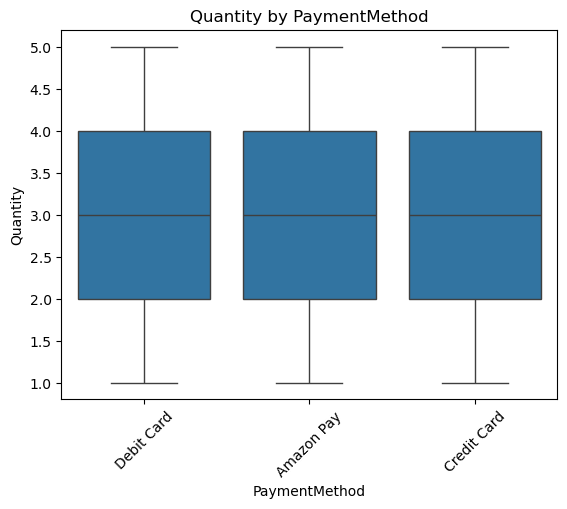

In [149]:
sns.boxplot(data=ds,x='PaymentMethod', y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity by PaymentMethod")
plt.show()

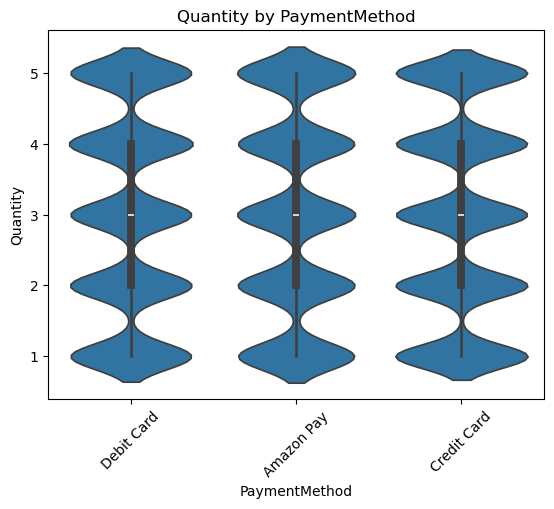

In [150]:
sns.violinplot(data=ds,x='PaymentMethod',y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity by PaymentMethod")
plt.show()

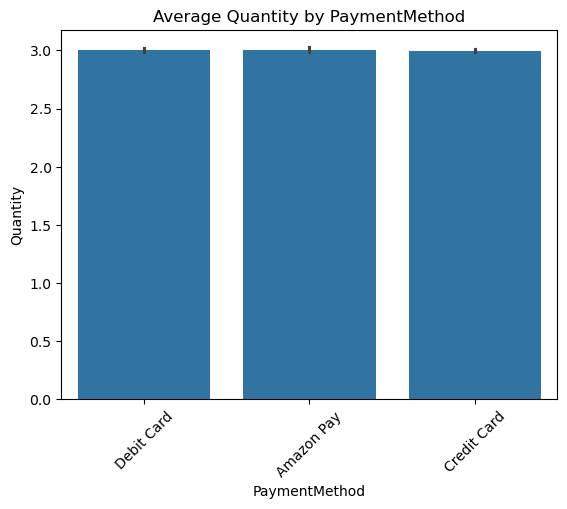

In [151]:
sns.barplot(data=ds, x='PaymentMethod', y='Quantity', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Quantity by PaymentMethod")
plt.show()

In [152]:
ds.groupby('PaymentMethod')['Quantity'].describe()

count      mean       std  min  25%  50%  75%  max
PaymentMethod                                                      
Amazon Pay     25009.0  3.006358  1.413337  1.0  2.0  3.0  4.0  5.0
Credit Card    44937.0  2.996217  1.414838  1.0  2.0  3.0  4.0  5.0
Debit Card     30054.0  3.005024  1.411814  1.0  2.0  3.0  4.0  5.0

The quantity of an item purchased is not affected by the PaymentMethod

#### OrderStatus vs TotalAmount

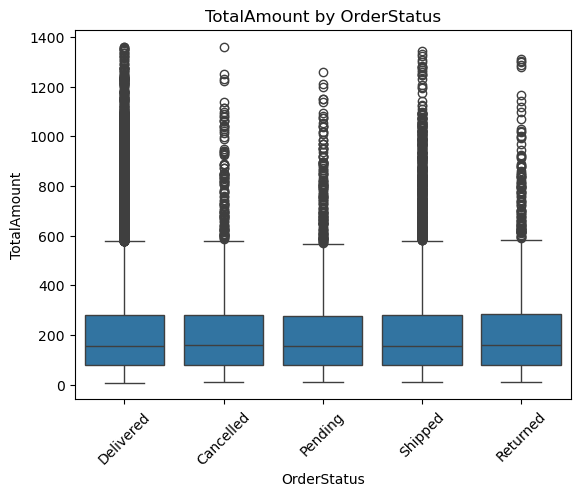

In [153]:
sns.boxplot(data=ds,x='OrderStatus', y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by OrderStatus")
plt.show()

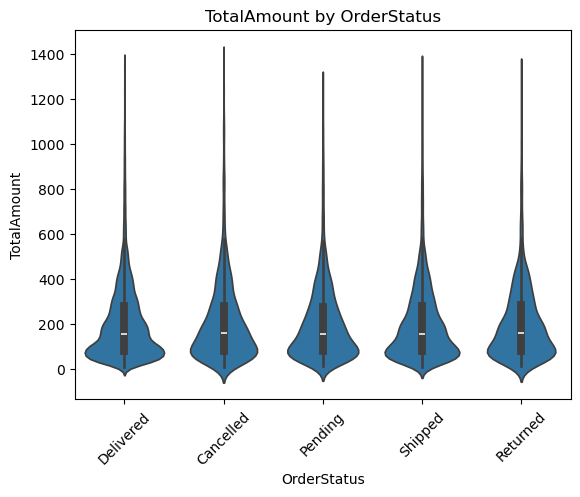

In [154]:
sns.violinplot(data=ds,x='OrderStatus',y='TotalAmount')
plt.xticks(rotation=45)
plt.title("TotalAmount by OrderStatus")
plt.show()

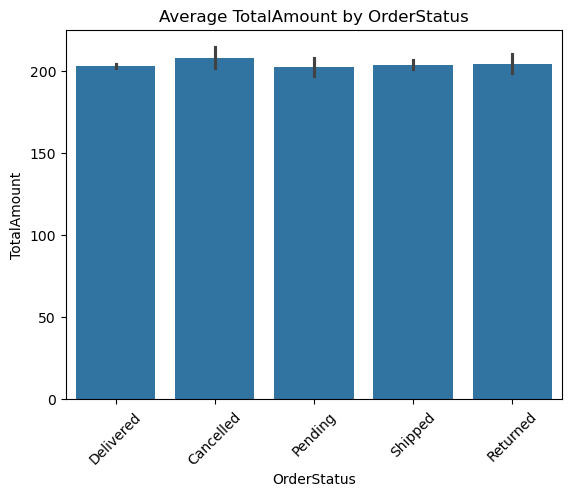

In [155]:
sns.barplot(data=ds, x='OrderStatus', y='TotalAmount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average TotalAmount by OrderStatus")
plt.show()

In [156]:
ds.groupby('OrderStatus')['TotalAmount'].describe()

count        mean         std    min      25%     50%  \
OrderStatus                                                            
Cancelled     3028.0  208.005231  177.185890  10.09  81.3525  159.63   
Delivered    74628.0  203.245805  170.827755   8.25  80.2400  156.93   
Pending       4103.0  202.473936  168.812134  10.93  80.2750  156.44   
Returned      3049.0  204.504841  169.825890  11.26  81.2000  160.97   
Shipped      15192.0  203.807328  173.173927  10.22  79.3800  156.24   

                  75%      max  
OrderStatus                     
Cancelled    280.7175  1360.89  
Delivered    279.3525  1360.55  
Pending      275.9150  1257.18  
Returned     284.6200  1311.15  
Shipped      279.7400  1341.62

Amazon doesn't discriminate by order total and ships indiscriminately

#### OrderStatus vs ShippingCost

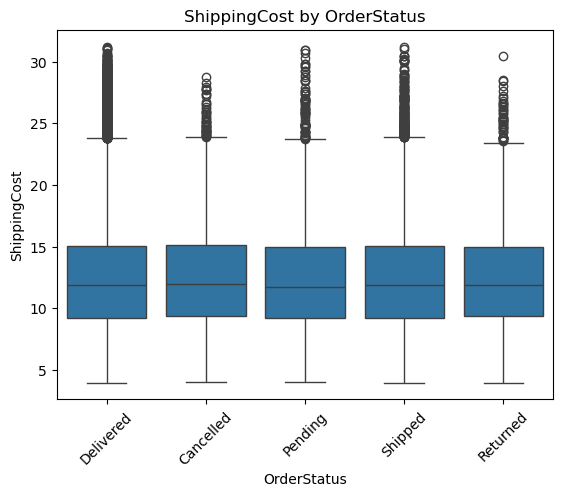

In [157]:
sns.boxplot(data=ds,x='OrderStatus', y='ShippingCost')
plt.xticks(rotation=45)
plt.title("ShippingCost by OrderStatus")
plt.show()

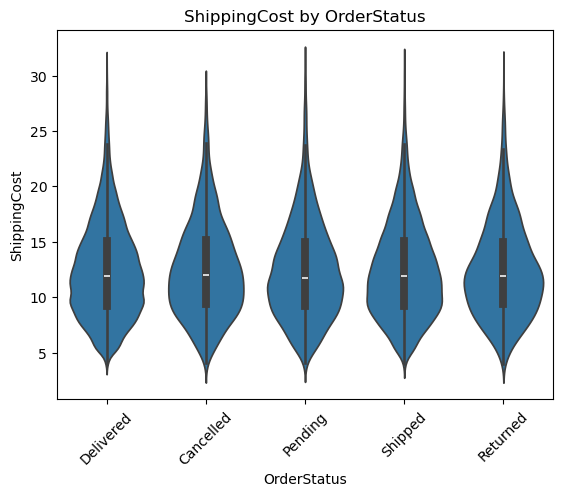

In [158]:
sns.violinplot(data=ds,x='OrderStatus',y='ShippingCost')
plt.xticks(rotation=45)
plt.title("ShippingCost by OrderStatus")
plt.show()

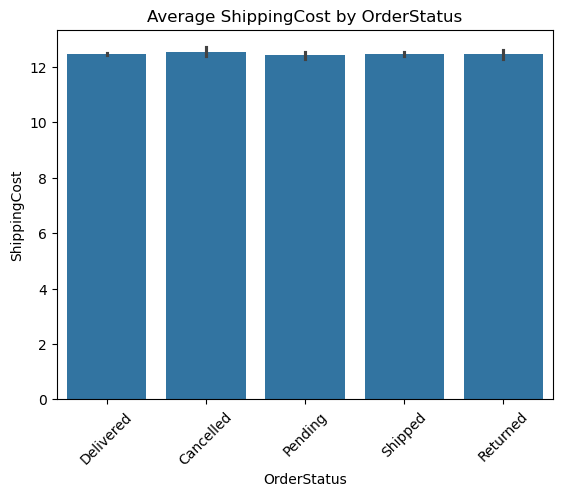

In [159]:
sns.barplot(data=ds, x='OrderStatus', y='ShippingCost', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average ShippingCost by OrderStatus")
plt.show()

In [160]:
ds.groupby('OrderStatus')['ShippingCost'].describe()

count       mean       std   min   25%    50%    75%    max
OrderStatus                                                               
Cancelled     3028.0  12.541232  4.277486  4.04  9.38  11.98  15.18  28.72
Delivered    74628.0  12.453412  4.308055  3.99  9.25  11.94  15.07  31.21
Pending       4103.0  12.416434  4.374477  4.04  9.21  11.78  15.01  30.95
Returned      3049.0  12.447130  4.206403  4.00  9.38  11.89  15.00  30.48
Shipped      15192.0  12.447567  4.277790  4.00  9.26  11.90  15.10  31.16

Shipping Cost does not have an affect on the status of an order

#### City vs TotalAmount

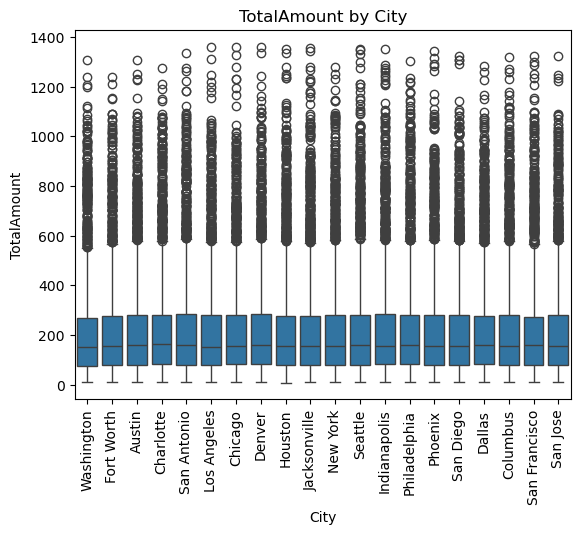

In [161]:
sns.boxplot(data=ds,x='City', y='TotalAmount')
plt.xticks(rotation=90)
plt.title("TotalAmount by City")
plt.show()

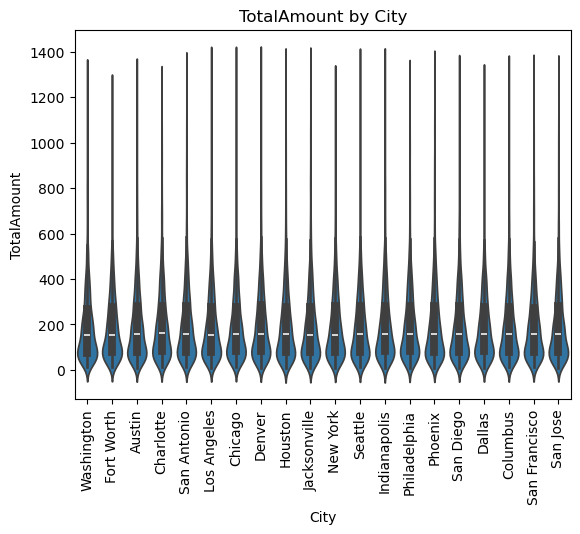

In [162]:
sns.violinplot(data=ds,x='City',y='TotalAmount')
plt.xticks(rotation=90)
plt.title("TotalAmount by City")
plt.show()

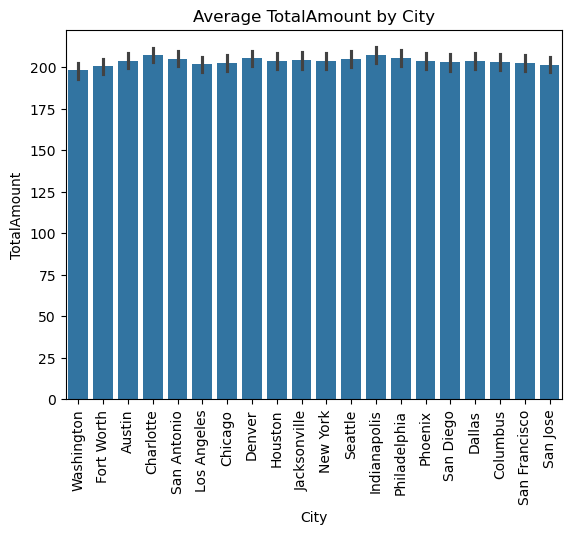

In [163]:
sns.barplot(data=ds, x='City', y='TotalAmount', estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average TotalAmount by City")
plt.show()

In [164]:
ds.groupby('City')['TotalAmount'].describe()

count        mean         std    min      25%      50%  \
City                                                                     
Austin         5043.0  203.921919  169.918027  10.30  80.1700  159.740   
Charlotte      5110.0  207.268755  171.792077  11.06  83.4300  163.070   
Chicago        5020.0  202.320462  166.783854  10.80  81.2600  156.395   
Columbus       5021.0  203.083360  171.562539  11.22  79.0800  157.340   
Dallas         5105.0  203.770292  170.165819  10.71  81.3600  158.380   
Denver         4991.0  205.232593  170.372084  10.09  81.1600  159.090   
Fort Worth     4934.0  200.504516  166.788076  10.98  80.4400  153.785   
Houston        4901.0  203.753897  174.176480   8.25  78.0200  157.280   
Indianapolis   4970.0  207.084475  175.730523   8.97  82.1825  156.790   
Jacksonville   5107.0  204.142156  177.356950  10.21  78.1500  154.660   
Los Angeles    5058.0  201.857098  169.584748  10.66  78.8200  153.250   
New York       4949.0  203.527791  172.203946  10.11  80.5900  155.590   
Philadelphia   5014.0  205.232373  171.864789  10.03  82.3875  158.285   
Phoenix        4941.0  203.397138  171.402817  10.05  79.0700  156.210   
San Antonio    4913.0  204.932894  172.426514  11.14  80.7500  158.590   
San Diego      4826.0  202.842665  169.174130  10.43  80.6100  156.330   
San Francisco  4930.0  202.527546  172.278884  12.06  79.6625  158.140   
San Jose       5107.0  201.160098  168.127091  10.29  79.5650  156.260   
Seattle        5039.0  205.066630  174.856895  11.26  79.1950  158.110   
Washington     5021.0  197.965680  168.393396  11.25  76.4000  151.970   

                    75%      max  
City                              
Austin         280.7550  1307.80  
Charlotte      281.8050  1274.18  
Chicago        278.8825  1360.89  
Columbus       278.8500  1320.53  
Dallas         277.9400  1282.59  
Denver         283.8350  1360.55  
Fort Worth     275.7200  1238.53  
Houston        277.7100  1350.76  
Indianapolis   282.6000  1350.68  
Jacksonville   275.6600  1353.66  
Los Angeles    278.5225  1359.92  
New York       280.8000  1277.03  
Philadelphia   281.4125  1300.77  
Phoenix        280.7900  1341.62  
San Antonio    283.3100  1334.32  
San Diego      280.4675  1323.18  
San Francisco  273.8225  1323.35  
San Jose       280.0750  1322.65  
Seattle        282.0850  1350.04  
Washington     266.5400  1305.02

The average total is pretty much the same acrossed all cities

#### City vs Quantity

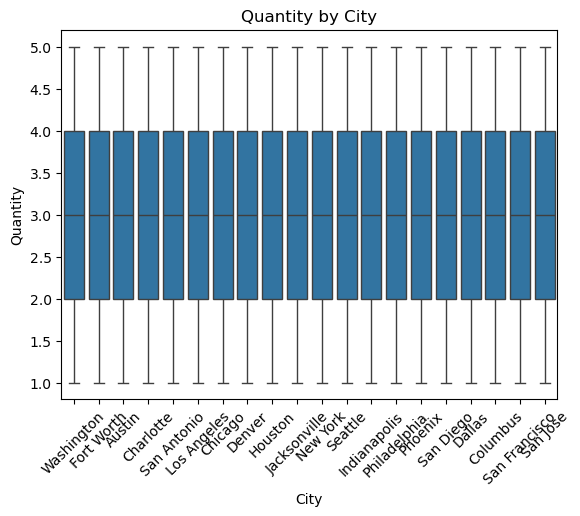

In [165]:
sns.boxplot(data=ds,x='City', y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity by City")
plt.show()

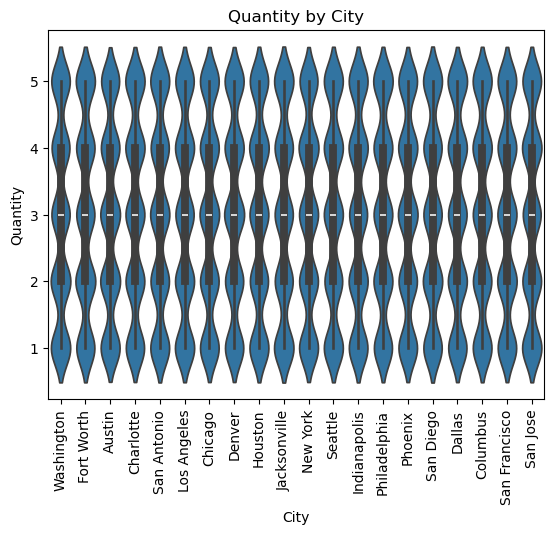

In [166]:
sns.violinplot(data=ds,x='City',y='Quantity')
plt.xticks(rotation=90)
plt.title("Quantity by City")
plt.show()

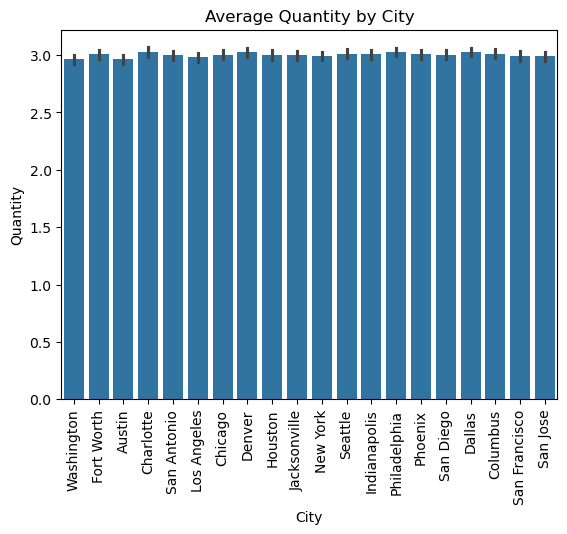

In [167]:
sns.barplot(data=ds, x='City', y='Quantity', estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Quantity by City")
plt.show()

In [168]:
ds.groupby('City')['Quantity'].describe()

count      mean       std  min  25%  50%  75%  max
City                                                              
Austin         5043.0  2.965298  1.399335  1.0  2.0  3.0  4.0  5.0
Charlotte      5110.0  3.025832  1.411761  1.0  2.0  3.0  4.0  5.0
Chicago        5020.0  3.004183  1.407924  1.0  2.0  3.0  4.0  5.0
Columbus       5021.0  3.011551  1.415856  1.0  2.0  3.0  4.0  5.0
Dallas         5105.0  3.023898  1.415535  1.0  2.0  3.0  4.0  5.0
Denver         4991.0  3.024043  1.404909  1.0  2.0  3.0  4.0  5.0
Fort Worth     4934.0  3.005675  1.414059  1.0  2.0  3.0  4.0  5.0
Houston        4901.0  3.000816  1.411324  1.0  2.0  3.0  4.0  5.0
Indianapolis   4970.0  3.005030  1.418254  1.0  2.0  3.0  4.0  5.0
Jacksonville   5107.0  2.998825  1.433197  1.0  2.0  3.0  4.0  5.0
Los Angeles    5058.0  2.980822  1.417087  1.0  2.0  3.0  4.0  5.0
New York       4949.0  2.990099  1.402483  1.0  2.0  3.0  4.0  5.0
Philadelphia   5014.0  3.027323  1.414725  1.0  2.0  3.0  4.0  5.0
Phoenix        4941.0  3.007691  1.405002  1.0  2.0  3.0  4.0  5.0
San Antonio    4913.0  2.997761  1.416298  1.0  2.0  3.0  4.0  5.0
San Diego      4826.0  2.998964  1.416044  1.0  2.0  3.0  4.0  5.0
San Francisco  4930.0  2.992089  1.406351  1.0  2.0  3.0  4.0  5.0
San Jose       5107.0  2.992363  1.421169  1.0  2.0  3.0  4.0  5.0
Seattle        5039.0  3.011709  1.418580  1.0  2.0  3.0  4.0  5.0
Washington     5021.0  2.963553  1.420421  1.0  2.0  3.0  4.0  5.0

The order quantity by city is the same. There isn't any significant differences

## Categorical to Categorical

#### PaymentMethod vs OrderStatus

In [169]:
pd.crosstab(ds['PaymentMethod'], ds['OrderStatus'])

OrderStatus    Cancelled  Delivered  Pending  Returned  Shipped
PaymentMethod                                                  
Amazon Pay           763      18723      987       761     3775
Credit Card         1352      33486     1897      1380     6822
Debit Card           913      22419     1219       908     4595

<Axes: xlabel='OrderStatus', ylabel='count'>

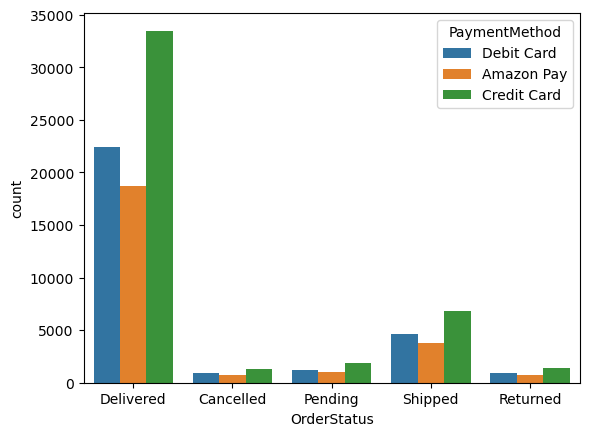

In [170]:
sns.countplot(data=ds, x='OrderStatus', hue='PaymentMethod')

In [171]:
ds.groupby('OrderStatus')['PaymentMethod'].value_counts(normalize=True).unstack().fillna(0)

PaymentMethod  Amazon Pay  Credit Card  Debit Card
OrderStatus                                       
Cancelled        0.251982     0.446499    0.301519
Delivered        0.250884     0.448706    0.300410
Pending          0.240556     0.462345    0.297100
Returned         0.249590     0.452607    0.297803
Shipped          0.248486     0.449052    0.302462

The trend across paymentmethods and orderstatus is almost the same. Amazon Pay hovers arounds 25% across all categories. Credit Card is at roughly 45% and debit card at 30%

#### Category vs Brand

In [172]:
pd.crosstab(ds['Category'], ds['Brand'])

Brand             Apex  BrightLux  CoreTech  FitLife  HomeEase  KiddoFun  \
Category                                                                   
Books              363        396       383      423       363       350   
Clothing          1317       1396      1424     1364      1351      1370   
Electronic        5009       4886      5055     5080      4929      4995   
Fitness & Sports   585        591       630      647       600       656   
Home & Kitchen    1227       1199      1227     1217      1185      1266   
Office Supplies    844        842       802      818       746       824   
Toys               592        597       606      598       621       616   

Brand             NexPro  ReadMore  UrbanStyle  Zenith  
Category                                                
Books                395       403         415     385  
Clothing            1325      1405        1419    1401  
Electronic          4989      5157        4874    5067  
Fitness & Sports     643       576         542     602  
Home & Kitchen      1235      1212        1251    1159  
Office Supplies      747       841         805     784  
Toys                 628       610         548     592

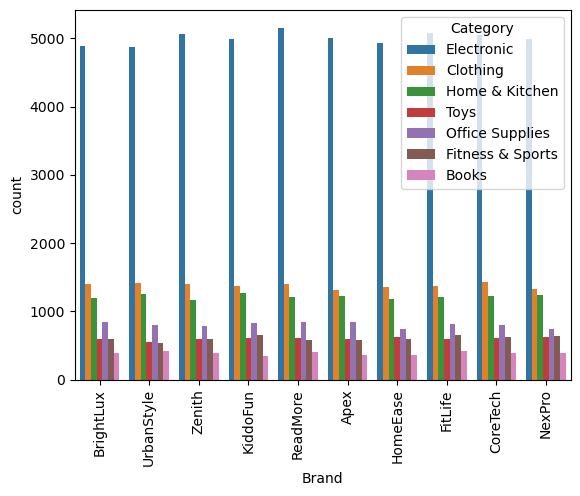

In [173]:
sns.countplot(data=ds, x='Brand', hue='Category')
plt.xticks(rotation=90)

plt.show()

In [174]:
ds.groupby('Brand')['Category'].value_counts(normalize=True).unstack().fillna(0)

Category       Books  Clothing  Electronic  Fitness & Sports  Home & Kitchen  \
Brand                                                                          
Apex        0.036530  0.132535    0.504076          0.058871        0.123478   
BrightLux   0.039972  0.140910    0.493187          0.059655        0.121026   
CoreTech    0.037820  0.140614    0.499161          0.062210        0.121161   
FitLife     0.041687  0.134424    0.500641          0.063763        0.119937   
HomeEase    0.037060  0.137928    0.503216          0.061256        0.120980   
KiddoFun    0.034733  0.135953    0.495683          0.065099        0.125633   
NexPro      0.039651  0.133005    0.500803          0.064545        0.123971   
ReadMore    0.039494  0.137691    0.505390          0.056448        0.118777   
UrbanStyle  0.042115  0.144002    0.494621          0.055003        0.126954   
Zenith      0.038539  0.140240    0.507207          0.060260        0.116016   

Category    Office Supplies      Toys  
Brand                                  
Apex               0.084935  0.059575  
BrightLux          0.084990  0.060260  
CoreTech           0.079194  0.059840  
FitLife            0.080615  0.058934  
HomeEase           0.076161  0.063400  
KiddoFun           0.081770  0.061129  
NexPro             0.074985  0.063040  
ReadMore           0.082419  0.059780  
UrbanStyle         0.081693  0.055612  
Zenith             0.078478  0.059259

Look across the brand and category. No brand is a leader in any category

#### City vs OrderStatus

In [175]:
pd.crosstab(ds['City'], ds['OrderStatus'])

OrderStatus    Cancelled  Delivered  Pending  Returned  Shipped
City                                                           
Austin               153       3756      210       136      788
Charlotte            134       3845      191       147      793
Chicago              139       3755      201       163      762
Columbus             170       3683      230       154      784
Dallas               164       3813      205       146      777
Denver               166       3733      178       160      754
Fort Worth           116       3682      201       132      803
Houston              142       3698      193       136      732
Indianapolis         177       3710      211       147      725
Jacksonville         154       3830      212       151      760
Los Angeles          151       3776      230       173      728
New York             167       3736      180       136      730
Philadelphia         146       3725      218       145      780
Phoenix              138       3655      218       158      772
San Antonio          160       3685      186       149      733
San Diego            140       3581      201       181      723
San Francisco        154       3681      206       155      734
San Jose             145       3832      197       161      772
Seattle              145       3735      210       162      787
Washington           167       3717      225       157      755

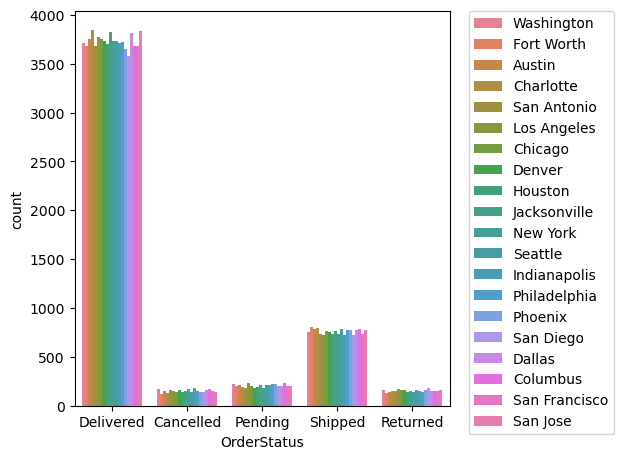

In [176]:
sns.countplot(data=ds, x='OrderStatus', hue='City')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [177]:
ds.groupby('OrderStatus')['City'].value_counts(normalize=True).unstack().fillna(0)

City           Austin  Charlotte   Chicago  Columbus    Dallas    Denver  \
OrderStatus                                                                
Cancelled    0.050528   0.044254  0.045905  0.056143  0.054161  0.054822   
Delivered    0.050330   0.051522  0.050316  0.049351  0.051093  0.050021   
Pending      0.051182   0.046551  0.048989  0.056057  0.049963  0.043383   
Returned     0.044605   0.048213  0.053460  0.050508  0.047885  0.052476   
Shipped      0.051869   0.052199  0.050158  0.051606  0.051145  0.049631   

City         Fort Worth   Houston  Indianapolis  Jacksonville  Los Angeles  \
OrderStatus                                                                  
Cancelled      0.038309  0.046896      0.058454      0.050859     0.049868   
Delivered      0.049338  0.049552      0.049713      0.051321     0.050598   
Pending        0.048989  0.047039      0.051426      0.051670     0.056057   
Returned       0.043293  0.044605      0.048213      0.049524     0.056740   
Shipped        0.052857  0.048183      0.047722      0.050026     0.047920   

City         New York  Philadelphia   Phoenix  San Antonio  San Diego  \
OrderStatus                                                             
Cancelled    0.055152      0.048217  0.045575     0.052840   0.046235   
Delivered    0.050062      0.049914  0.048976     0.049378   0.047985   
Pending      0.043870      0.053132  0.053132     0.045333   0.048989   
Returned     0.044605      0.047557  0.051820     0.048868   0.059364   
Shipped      0.048052      0.051343  0.050816     0.048249   0.047591   

City         San Francisco  San Jose   Seattle  Washington  
OrderStatus                                                 
Cancelled         0.050859  0.047886  0.047886    0.055152  
Delivered         0.049325  0.051348  0.050048    0.049807  
Pending           0.050207  0.048014  0.051182    0.054838  
Returned          0.050836  0.052804  0.053132    0.051492  
Shipped           0.048315  0.050816  0.051804    0.049697

The order level ratios stay pretty much the same across each city

#### Category vs PaymentMethod

In [178]:
pd.crosstab(ds['Category'], ds['PaymentMethod'])

PaymentMethod     Amazon Pay  Credit Card  Debit Card
Category                                             
Books                    996         1709        1171
Clothing                3415         6244        4113
Electronic             12504        22518       15019
Fitness & Sports        1512         2714        1846
Home & Kitchen          3046         5456        3676
Office Supplies         2024         3588        2441
Toys                    1512         2708        1788

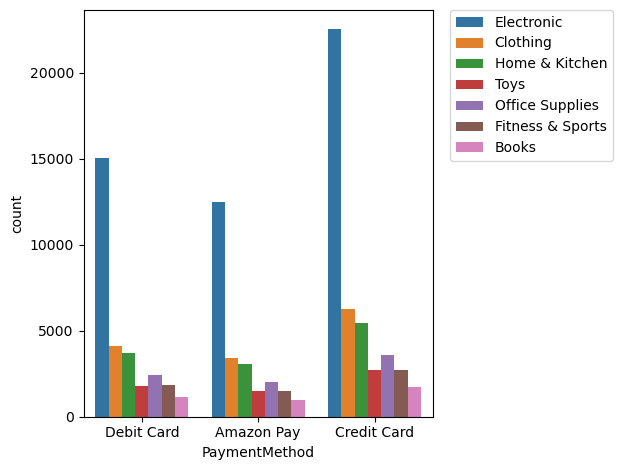

In [179]:
sns.countplot(data=ds, x='PaymentMethod', hue='Category')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [180]:
ds.groupby('PaymentMethod')['Category'].value_counts(normalize=True).unstack().fillna(0)

Category          Books  Clothing  Electronic  Fitness & Sports  \
PaymentMethod                                                     
Amazon Pay     0.039826  0.136551    0.499980          0.060458   
Credit Card    0.038031  0.138950    0.501102          0.060396   
Debit Card     0.038963  0.136854    0.499734          0.061423   

Category       Home & Kitchen  Office Supplies      Toys  
PaymentMethod                                             
Amazon Pay           0.121796         0.080931  0.060458  
Credit Card          0.121414         0.079845  0.060262  
Debit Card           0.122313         0.081220  0.059493

There isn't any key differences across the groupings

#### State Vs OrderStatus

In [181]:
pd.crosstab(ds['State'], ds['OrderStatus'])

OrderStatus  Cancelled  Delivered  Pending  Returned  Shipped
State                                                        
AZ                 138       3655      218       158      772
CA                 590      14870      834       670     2957
CO                 166       3733      178       160      754
DC                 167       3717      225       157      755
FL                 154       3830      212       151      760
IL                 139       3755      201       163      762
IN                 177       3710      211       147      725
NC                 134       3845      191       147      793
NY                 167       3736      180       136      730
OH                 170       3683      230       154      784
PA                 146       3725      218       145      780
TX                 735      18634      995       699     3833
WA                 145       3735      210       162      787

<Axes: xlabel='OrderStatus', ylabel='count'>

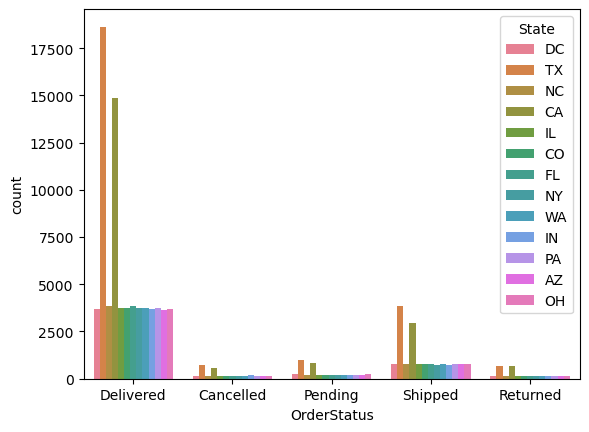

In [182]:
sns.countplot(data=ds, x='OrderStatus', hue='State')

In [183]:
ds.groupby('OrderStatus')['State'].value_counts(normalize=True).unstack().fillna(0)

State              AZ        CA        CO        DC        FL        IL  \
OrderStatus                                                               
Cancelled    0.045575  0.194848  0.054822  0.055152  0.050859  0.045905   
Delivered    0.048976  0.199255  0.050021  0.049807  0.051321  0.050316   
Pending      0.053132  0.203266  0.043383  0.054838  0.051670  0.048989   
Returned     0.051820  0.219744  0.052476  0.051492  0.049524  0.053460   
Shipped      0.050816  0.194642  0.049631  0.049697  0.050026  0.050158   

State              IN        NC        NY        OH        PA        TX  \
OrderStatus                                                               
Cancelled    0.058454  0.044254  0.055152  0.056143  0.048217  0.242734   
Delivered    0.049713  0.051522  0.050062  0.049351  0.049914  0.249692   
Pending      0.051426  0.046551  0.043870  0.056057  0.053132  0.242505   
Returned     0.048213  0.048213  0.044605  0.050508  0.047557  0.229255   
Shipped      0.047722  0.052199  0.048052  0.051606  0.051343  0.252304   

State              WA  
OrderStatus            
Cancelled    0.047886  
Delivered    0.050048  
Pending      0.051182  
Returned     0.053132  
Shipped      0.051804

The Orderstatus doesn't differentiate via state.

## Exporting dataset

Since I made some major changes to the dataset, I am going to want to export the dataset to a csv and store it in the data folder.

## Next Steps

Now that I have completed EDA. I will now be working on feature engineering and preparing the data for modeling

In [184]:
data_path=Path("..","Data")

ds.to_csv(data_path / "amazon_cleaned.csv", index=False)